## Exploratory data analysis of dataset "Car Features and MSRP"

## Introduction

### Data descritpion

This Kaggle dataset contains information about cars, sourced from both Edmunds and Twitter. It includes various features such as the make, model, year, engine, and other relevant properties of each car. The purpose of this dataset is to use these features to predict the price of the cars.

### Features Description:

**1. Categorical Attributes**:

 * **Make (car's manufacturer)**: BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nissan, Volvo, Mazda, Mitsubishi, Ferrari, Alfa Romeo, Toyota, McLaren, Maybach, Pontiac, Porsche, Saab, GMC, Hyundai, Plymouth, Honda, Oldsmobile, Suzuki, Ford, Cadillac, Kia, Bentley, Chevrolet, Dodge, Lamborghini, Lincoln, Subaru, Volkswagen, Spyker, Buick, Acura, Rolls-Royce, Maserati, Lexus, Aston Martin, Land Rover, Lotus, Infiniti, Scion, Genesis, HUMMER, Tesla, Bugatti;
 * **Model (car's model)**: '1 Series M', '1 Series', '100', '124 Spider'... (there are 915 models in this dataset);
 * **Engine Fuel Type**: premium unleaded (required), regular unleaded, premium unleaded (recommended), flex-fuel (unleaded/E85), diesel, electric, flex-fuel (premium unleaded recommended/E85), natural gas, flex-fuel (premium unleaded required/E85), flex-fuel (unleaded/natural gas);
 * **Transmission Type**: manual, automatic, automated_manual, direct_drive;
 * **Driven Wheels (type of drivetrain configuration)**: rear wheel drive, front wheel drive, all wheel drive, four wheel drive;
 * **Market Category**: 'Factory Tuner,Luxury,High-Performance', 'Luxury,Performance', 'Luxury,High-Performance'... (there are 72 market categories in this dataset);
 * **Vehicle Size**: Compact, Midsize, Large;
 * **Vehicle Style (car body styles)**: Coupe, Convertible, Sedan, Wagon, 4dr Hatchback, 2dr Hatchback, 4dr SUV, Passenger Minivan, Cargo Minivan, Crew Cab Pickup, Regular Cab Pickup, Extended Cab Pickup, 2dr SUV, Cargo Van, Convertible SUV, Passenger Van;
 * **Engine Cylinders**: 0, 3, 4, 5, 6, 8, 10, 12, 16;
 * **Number of Doors**: 2, 3, 4;



**2. Continuous Attributes**

 * **Year**: continuous;
 * **Engine HP (engine power - horsepower)**: continuous;
 * **Highway MPG (the measure of a vehicle's fuel efficiency or how many miles it can travel on a gallon of fuel while driving on the highway)**: continuous;
 * **City MPG (the measure of a vehicle's fuel efficiency or how many miles it can travel on a gallon of fuel while driving in city or urban areas with frequent stops and lower speeds)**: continuous;
 * **Popularity**: continuous;
 * **MSRP (Manufacturers Suggested Retail Price)**: continuous;

### Objective of this project:
The objective of this project is to analyze the effects of different features on the price of cars. Additionally, it aims to examine the influence of the brand on car prices and compare the relationship between price and popularity. By exploring these aspects, the project seeks to gain insights into the factors that drive car prices and understand how brand and popularity contribute to pricing dynamics in the market.

## Fetching Data

### Import packages

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Import data

In [208]:
cars_df = pd.read_csv("data.csv")

Upon initial examination of the data, the following steps were performed:
- Examining the overall composition of the dataset.
- Gathering basic information about the data, such as the number of columns and rows, data types and column names.
- Renaming columns to improve clarity and consistency.
- Exploring the unique values present in specific columns.

In [209]:
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [210]:
cars_df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [211]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [212]:
cars_df.shape

(11914, 16)

In [213]:
cars_df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [214]:
cars_df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [215]:
cars_df = cars_df.rename(columns = {'Engine Fuel Type':'Engine_Fuel_Type',
                             'Engine HP':'Engine_HP',
                             'Engine Cylinders':'Engine_Cylinders',
                             'Transmission Type':'Transmission_Type',
                             'Number of Doors':'Number_of_Doors',
                             'Market Category':'Market_Category',
                             'Vehicle Size':'Vehicle_Size',
                             'Vehicle Style':'Vehicle_Style',
                             'highway MPG':'Highway_MPG',
                             'city mpg':'City_MPG'})

In [216]:
cars_df.head()

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [217]:
for col in cars_df.columns:
    print('{} : {}'.format(col, cars_df[col].unique()))

Make : ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model : ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti'

After initial examination of the data, we can observe, that dataset contains a wide range of information about car features, including multiple brands and models. While it offers detailed data, it is important to note that it does not cover every brand available in the market.

## Data cleaning

#### NaN and unknown values

In [218]:
cars_df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
Highway_MPG             0
City_MPG                0
Popularity              0
MSRP                    0
dtype: int64

The dataset contains a market category variable that requires a distinct approach to address missing values compared to other variables. Notably, the market category variable represents approximately 30% of the dataset. To handle this, an examination of classes with a lower proportion of missing values will be conducted to determine if the missing values are randomly distributed. If so, appropriate methods such as filling the missing values with the mean or majority class can be applied confidently.

Regarding the market category variable specifically, a comprehensive investigation of all instances with missing values will be undertaken. In this case, all missing values will be left as NaN to ensure the data distribution remains unbiased and to prevent potential skewing. It is important to note that during the analysis of the market category, records with missing values will be filtered out.

This approach effectively manages missing values in the market category variable while maintaining the integrity of the dataset.

In [219]:
df_nan = cars_df[cars_df.drop('Market_Category', axis=1).isnull().any(axis=1)]
df_nan

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
2907,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,53915
2908,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,64915
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,126,873,33450


In [220]:
df_nan.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,Highway_MPG,City_MPG,Popularity,MSRP
count,102.000000,33.000000,72.000000,96.000000,102.000000,102.000000,102.000000,102.000000
mean,2013.019608,207.000000,2.250000,3.875000,63.294118,66.647059,1697.500000,44624.911765
std,4.949208,96.032221,2.925122,0.486664,37.646766,47.991882,1637.449664,34177.442888
min,1993.000000,66.000000,0.000000,2.000000,16.000000,11.000000,61.000000,7523.000000
25%,2011.000000,155.000000,0.000000,4.000000,23.000000,16.000000,586.000000,29010.000000
50%,2015.000000,212.000000,0.000000,4.000000,74.000000,78.000000,1391.000000,33575.000000
75%,2016.000000,232.000000,6.000000,4.000000,101.000000,120.000000,2009.000000,49800.000000
max,2017.000000,651.000000,12.000000,4.000000,110.000000,132.000000,5657.000000,295000.000000


In [221]:
cars_df.describe()

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,Highway_MPG,City_MPG,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Based on the analysis, it can be observed that the dataset shows consistent distributions across various features, except for engine cylinders where some differences exist. However, the absence of a clear pattern suggests that filling in missing values in this particular feature would not have a significant impact on the overall data.

In [222]:
cars_df.describe(include=["O"])

,Make,Model,Engine_Fuel_Type,Transmission_Type,Driven_Wheels,Market_Category,Vehicle_Size,Vehicle_Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [224]:
cars_df['Engine_Fuel_Type'] = cars_df['Engine_Fuel_Type'].astype(str)
cars_df['Engine_Cylinders'] = cars_df['Engine_Cylinders'].astype(str)
cars_df['Market_Category'] = cars_df['Market_Category'].astype(str)
cars_df['Number_of_Doors'] = cars_df['Number_of_Doors'].astype(str)

In [225]:
cars_df.loc[cars_df['Engine_HP'].isnull(), 'Engine_HP'] = str(cars_df['Engine_HP'].apply(lambda x: float(x)).mean())

In [226]:
cars_df['Transmission_Type'] = cars_df['Transmission_Type'].replace('UNKNOWN', 'AUTOMATIC')

In [227]:
def fill_missing_values(df, column_name):
    attrib, counts = np.unique(df[column_name], return_counts = True)
    most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
    df.loc[df[column_name] == 'nan', column_name] = most_freq_attrib
    

fill_missing_values(cars_df, 'Engine_Fuel_Type')
fill_missing_values(cars_df, 'Engine_Cylinders')
fill_missing_values(cars_df, 'Number_of_Doors')

In [228]:
cars_df.isna().sum()

Make                 0
Model                0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine_Cylinders     0
Transmission_Type    0
Driven_Wheels        0
Number_of_Doors      0
Market_Category      0
Vehicle_Size         0
Vehicle_Style        0
Highway_MPG          0
City_MPG             0
Popularity           0
MSRP                 0
dtype: int64

In [229]:
cars_df['Number_of_Doors'] = cars_df['Number_of_Doors'].apply(lambda x: x.split('.')[0])
cars_df['Engine_Cylinders'] = cars_df['Engine_Cylinders'].apply(lambda x: x.split('.')[0])

In [230]:
cars_df['Engine_HP'] = cars_df['Engine_HP'].astype(float).round(1)

In [231]:
cars_df.head(20)

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,27,18,3916,37200


In [232]:
len(cars_df[cars_df['Engine_Cylinders'] == '0'])

56

In [233]:
cars_df[cars_df['Engine_Cylinders'] == '0']

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
539,FIAT,500e,2015,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
4705,Honda,Fit EV,2013,electric,249.4,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,249.4,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4785,Ford,Focus,2015,electric,249.4,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,249.4,0,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


In [234]:
pd.set_option('display.max_rows', None)
cars_df[cars_df['Engine_Fuel_Type'] == 'electric']

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
539,FIAT,500e,2015,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,249.4,0,DIRECT_DRIVE,front wheel drive,2,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0,DIRECT_DRIVE,front wheel drive,4,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
1983,Chevrolet,Bolt EV,2017,electric,200.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,35445


When analyzing electric cars, it is noticeable that they have high values for Highway MPG and City MPG, even though electric cars do not use traditional fuel. One possible explanation for this inconsistency is the conversion from kilowatt-hours (kWh) to MPG, which is used to compare the efficiency of electric cars with conventional fuel-powered vehicles.

In [235]:
electric_filter = cars_df[cars_df['Engine_Fuel_Type'] == 'electric']
electric_filter[electric_filter['Engine_Cylinders'] != '0']

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,4,DIRECT_DRIVE,front wheel drive,4,Hatchback,Compact,4dr Hatchback,105,126,873,35595
5778,Mitsubishi,i-MiEV,2014,electric,249.4,4,DIRECT_DRIVE,rear wheel drive,4,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,4,DIRECT_DRIVE,rear wheel drive,4,Hatchback,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,4,DIRECT_DRIVE,rear wheel drive,4,Hatchback,Compact,4dr Hatchback,102,121,436,22995
8373,Toyota,RAV4 EV,2012,electric,154.0,4,DIRECT_DRIVE,front wheel drive,4,Crossover,Midsize,4dr SUV,74,78,2031,49800


Upon closer examination, it becomes apparent that there are instances in the dataset where the number of cylinders is listed as 0. However, upon further analysis, it is evident that this value corresponds to electric cars, as electric engines do not have cylinders. Additionally, there are cases where electric cars are incorrectly labeled as having 4 cylinders, which is not possible. To rectify this issue, the erroneous values will be addressed by replacing them with the most frequently occurring value for the number of cylinders.

In [236]:
cars_df.loc[(cars_df['Engine_Cylinders'] == '4') & (cars_df['Engine_Fuel_Type'] == 'electric'), 'Engine_Cylinders'] = '0'

#### Duplicated values

In [237]:
cars_df.loc[cars_df.duplicated()]

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6,MANUAL,front wheel drive,4,Luxury,Midsize,Sedan,24,17,3105,2000
88,Nissan,200SX,1996,regular unleaded,115.0,4,MANUAL,front wheel drive,2,nan,Compact,Coupe,36,26,2009,2000
92,Nissan,200SX,1997,regular unleaded,115.0,4,MANUAL,front wheel drive,2,nan,Compact,Coupe,35,25,2009,2000
94,Nissan,200SX,1998,regular unleaded,115.0,4,MANUAL,front wheel drive,2,nan,Compact,Coupe,35,25,2009,2000
109,Volvo,240,1992,regular unleaded,114.0,4,MANUAL,rear wheel drive,4,Luxury,Midsize,Sedan,26,19,870,2000
126,BMW,3 Series Gran Turismo,2015,premium unleaded (required),240.0,4,AUTOMATIC,all wheel drive,4,"Hatchback,Luxury",Midsize,4dr Hatchback,33,22,3916,41850


In [238]:
cars_df.drop_duplicates(inplace=True)

A total of 715 duplicate entries were identified in the dataset and removed.

## Summary

### Summary statistics for numeric attribute

In [239]:
auto_num = cars_df.drop(['Year'], axis=1)
auto_num.describe()

,Engine_HP,Highway_MPG,City_MPG,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,253.364283,26.610590,19.731851,1558.483347,4.192593e+04
std,109.811492,8.977641,9.177555,1445.668872,6.153505e+04
min,55.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,172.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,240.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,303.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,1001.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Summary of attributes explain following things:
#### For Engine Power:
1. Mean: The average engine power across the dataset is approximately 253.36 horsepower.
2. Standard Deviation: The standard deviation of engine power is approximately 109.81, indicating a moderate amount of variability in the data points around the mean.
3. Minimum: The minimum engine power recorded in the dataset is 55 horsepower.
4. 25th Percentile: 25% of the engine power values fall below or equal to 172 horsepower.
5. Median: The median engine power value is 240 horsepower, indicating that 50% of the observations have engine power values below or equal to this value.
6. 75th Percentile: 75% of the engine power values fall below or equal to 303 horsepower.
7. Maximum: The maximum recorded engine power in the dataset is 1001 horsepower.

#### For Highway MPG:
1. Mean: The average Highway MPG across the dataset is approximately 26.61. This indicates that, on average, vehicles in the dataset can travel around 26.61 miles per gallon on the highway.
2. Standard Deviation: The standard deviation of approximately 8.98 suggests a moderate amount of variability or dispersion in the Highway MPG data. This indicates that there is some variation in the fuel efficiency of the vehicles in the dataset, with values spread out around the mean.
3. Minimum: The minimum of the Highway_MPG values recorded in the dataset is 12.
4. 25th Percentile: 25% of the Highway_MPG values fall below or equal to 22. This indicates that a significant proportion of the vehicles in the dataset have Highway_MPG values in the lower range.
5. Median: The median Highway_MPG value is 25, indicating that 50% of the observations have Highway_MPG values below or equal to this value.
6. 75th Percentile: 75% of the Highway_MPG values fall below or equal to 30. This suggests that the majority of the vehicles in the dataset have Highway_MPG values in the moderate to higher range.
7. Maximum: The maximum recorded Highway_MPG in the dataset is 354. However, this exceptionally high value might indicate a potential outlier that needs further investigation. This outlier could contribute to the relatively higher standard deviation.

#### For City MPG:
1. Mean: The average city MPG across the dataset is approximately 19.73.
2. Standard Deviation: The standard deviation of city MPG is approximately 9.18, indicating a moderate amount of variability in the data points around the mean.
3. Minimum: The minimum city MPG recorded in the dataset is 7, suggesting that there are vehicles with relatively lower fuel efficiency in city driving conditions.
4. 25th Percentile: 25% of the city MPG values fall below or equal to 16. This indicates that a significant proportion of the vehicles in the dataset have city MPG values in the lower range.
5. Median: The median city MPG value is 18, indicating that 50% of the observations have city MPG values below or equal to this value.
6. 75th Percentile: 75% of the city MPG values fall below or equal to 22. This suggests that the majority of the vehicles in the dataset have city MPG values in the moderate range.
7. Maximum: The maximum recorded city MPG in the dataset is 137. However, this exceptionally high value might indicate a potential outlier that needs further investigation.
8. Based on the data, it can be observed that the mean Highway MPG (miles per gallon) value of approximately 26.61 is higher than the mean City MPG value of approximately 19.73. This suggests that, on average, cars tend to have better fuel efficiency and can travel more miles per gallon on the highway compared to city driving conditions.

#### For Popularity:
1. Mean: The average popularity score across the dataset is approximately 1558.48.
2. Standard Deviation: The standard deviation of popularity is approximately 1445.67, indicating a relatively high amount of variability in the data points around the mean.
3. Minimum: The minimum popularity score recorded in the dataset is 2, suggesting that there are vehicles with relatively low popularity.
4. 25th Percentile: 25% of the popularity values fall below or equal to 549. This indicates that a significant proportion of the vehicles in the dataset have lower popularity scores.
5. Median: The median popularity score is 1385, indicating that 50% of the observations have popularity scores below or equal to this value.
6. 75th Percentile: 75% of the popularity values fall below or equal to 2009. This suggests that the majority of the vehicles in the dataset have popularity scores in the moderate to higher range.
7. Maximum: The maximum recorded popularity score in the dataset is 5657, indicating that there are highly popular vehicles present as well.
8. The wide range and relatively high standard deviation of popularity scores indicate a diverse range of popularity levels among the vehicles in the dataset.

#### For MSRP(price):
1. Mean: The average MSRP across the dataset is approximately 41,925.93 dollars.
2. Standard Deviation: The standard deviation of MSRP is approximately 61,535.05 dollars, indicating a relatively high amount of variability in the data points around the mean.
3. Minimum: The minimum MSRP recorded in the dataset is 2,000 dollars, suggesting that there are vehicles with relatively lower prices.
4. 25th Percentile: 25% of the MSRP values fall below or equal to 21,599.50 dollars. This indicates that a significant proportion of the vehicles in the dataset have lower price values.
5. Median: The median MSRP value is 30,675 dollars, indicating that 50% of the observations have prices below or equal to this value.
6. 75th Percentile: 75% of the MSRP values fall below or equal to 43,032.50 dollars. This suggests that the majority of the vehicles in the dataset have prices in the moderate to higher range.
7. Maximum: The maximum recorded MSRP in the dataset is 2,065,902 dollars, indicating that there are vehicles with significantly higher prices present as well.
8. The wide range and relatively high standard deviation of prices indicate a diverse range of prices among the vehicles in the dataset, with both lower-priced and higher-priced vehicles represented.

### Summary and count for categorical attribute

In [240]:
cars_df.describe(include=["O"])

,Make,Model,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style
count,11199,11199,11199,11199,11199,11199,11199,11199,11199,11199
unique,48,915,10,9,4,4,3,72,3,16
top,Chevrolet,Silverado 1500,regular unleaded,4,AUTOMATIC,front wheel drive,4,nan,Compact,Sedan
freq,1083,156,6661,4382,7944,4354,7966,3376,4395,2843


# Summary and count for categorical attribute:
1. Make: There are a total of 48 unique car makes in the dataset. The most common make is Chevrolet, with a frequency of 1083 occurrences.
2. Model: There are 915 unique car models in the dataset. The most common model is the Silverado 1500, with a frequency of 156 occurrences.
3. Engine Fuel Type: There are 10 unique engine fuel types in the dataset. The most common fuel type is regular unleaded, with a frequency of 6661 occurrences.
4. Engine Cylinders: There are 9 unique numbers of engine cylinders in the dataset. The most common number of engine cylinders is 4, with a frequency of 4382 occurrences.
5. Transmission Type: There are 4 unique transmission types in the dataset. The most common transmission type is automatic, with a frequency of 7944 occurrences.
6. Driven Wheels: There are 4 unique driven wheel types in the dataset. The most common driven wheel type is front wheel drive, with a frequency of 4354 occurrences.
7. Number of Doors: There are 3 unique numbers of doors in the dataset. The most common number of doors is 4, with a frequency of 7966 occurrences.
8. Market Category: There are 71 unique market categories in the dataset. After replacing missing values, the most common market category is Crossover, with a frequency of 1110 occurrences.
9. Vehicle Size: There are 3 unique vehicle sizes in the dataset. The most common vehicle size is Compact, with a frequency of 4395 occurrences.
10. Vehicle Style: There are 16 unique vehicle styles in the dataset. The most common vehicle style is sedan, with a frequency of 2843 occurrences.

## EDA

### Univariate analysis

### Year

<function matplotlib.pyplot.show(close=None, block=None)>

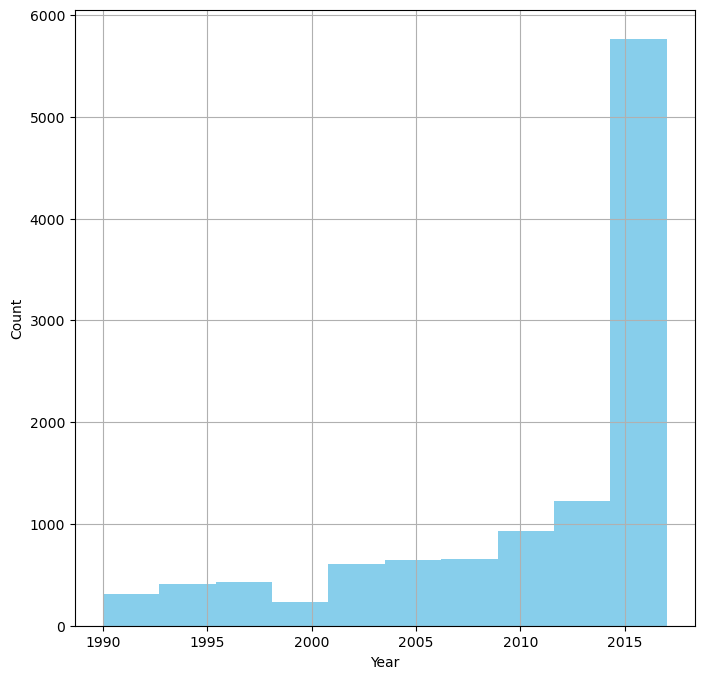

In [241]:
cars_df['Year'].hist(figsize=(8,8), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'Year':
#### The above histogram shows that:

- The distribution of the 'year' attribute is not symmetrical and shows a left-skewed pattern. 
- The majority of cars in the dataset are relatively new, with a significant increase in the number of cars observed after the year 2014.
- There is a slight decrease in the number of cars around the year 2000.

In [242]:
cars_df['Year'].value_counts()

2016    2073
2015    2065
2017    1625
2014     554
2009     364
2012     351
2007     334
2013     325
2008     322
2011     284
2010     281
2003     238
2004     235
2005     213
2002     205
2006     194
2001     168
1997     166
1993     160
1998     145
1994     129
1992     127
1995     117
1996     115
2000     115
1999     114
1991     103
1990      77
Name: Year, dtype: int64

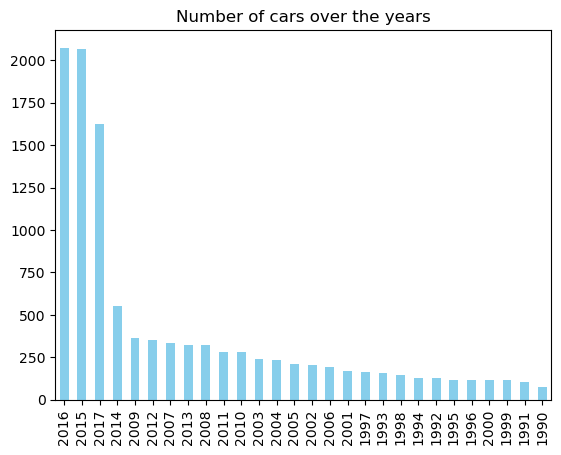

In [243]:
ax = cars_df['Year'].value_counts() \
    .plot(kind = 'bar', title='Number of cars over the years', color='skyblue')

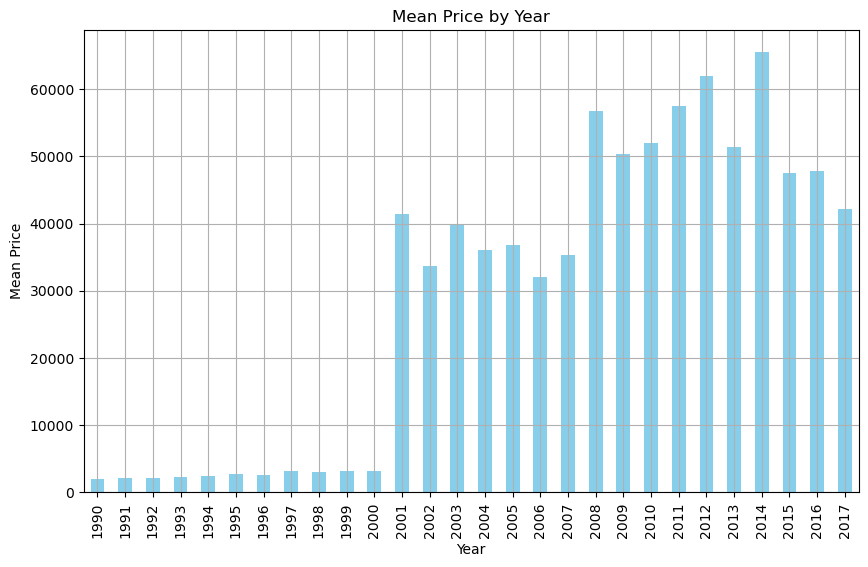

In [244]:
mean_price_by_year = cars_df.groupby('Year')['MSRP'].mean()
plt.figure(figsize=(10, 6))
mean_price_by_year.plot(kind = 'bar', title = 'Mean Price by Year', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In this bar plot, it can be observed, that the average price of cars is relatively low until the year 2000. However, in 2001, there is a significant increase in the average price, reaching around 42,000 dollars. In the following years, the difference in average price becomes smaller. The peak average price of cars is observed in 2014.

### Engine HP

<function matplotlib.pyplot.show(close=None, block=None)>

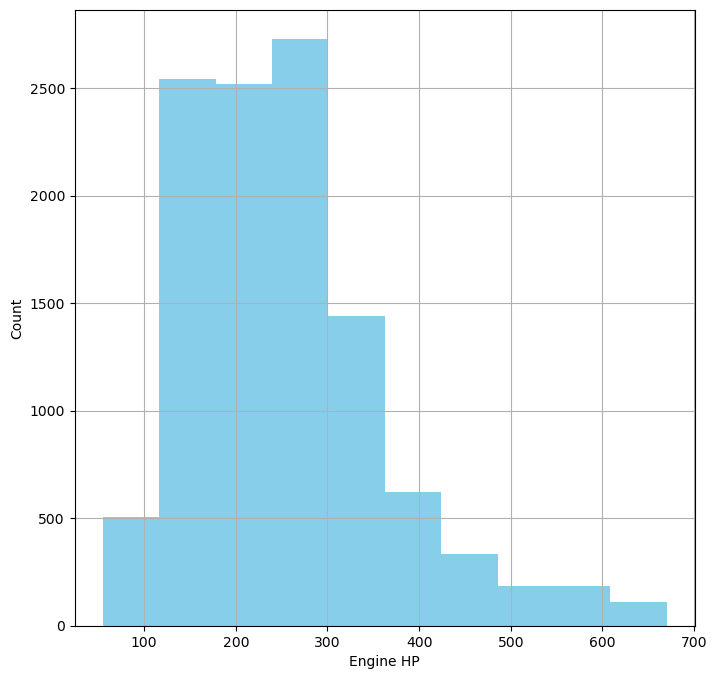

In [245]:
filtered_engine = cars_df[cars_df['Engine_HP'] < 700]
filtered_engine['Engine_HP'].hist(figsize=(8,8), color='skyblue')
plt.xlabel('Engine HP')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'Engine HP':
#### The above histogram shows that:

- The distribution of the 'Engine_HP' attribute is asymmetric and exhibits a right-skew.
- There is a significant decrease in the number of cars with engines that have horsepower greater than 300.
- Additionally, there are relatively few cars with horsepower exceeding 500.

### Highway MPG

<function matplotlib.pyplot.show(close=None, block=None)>

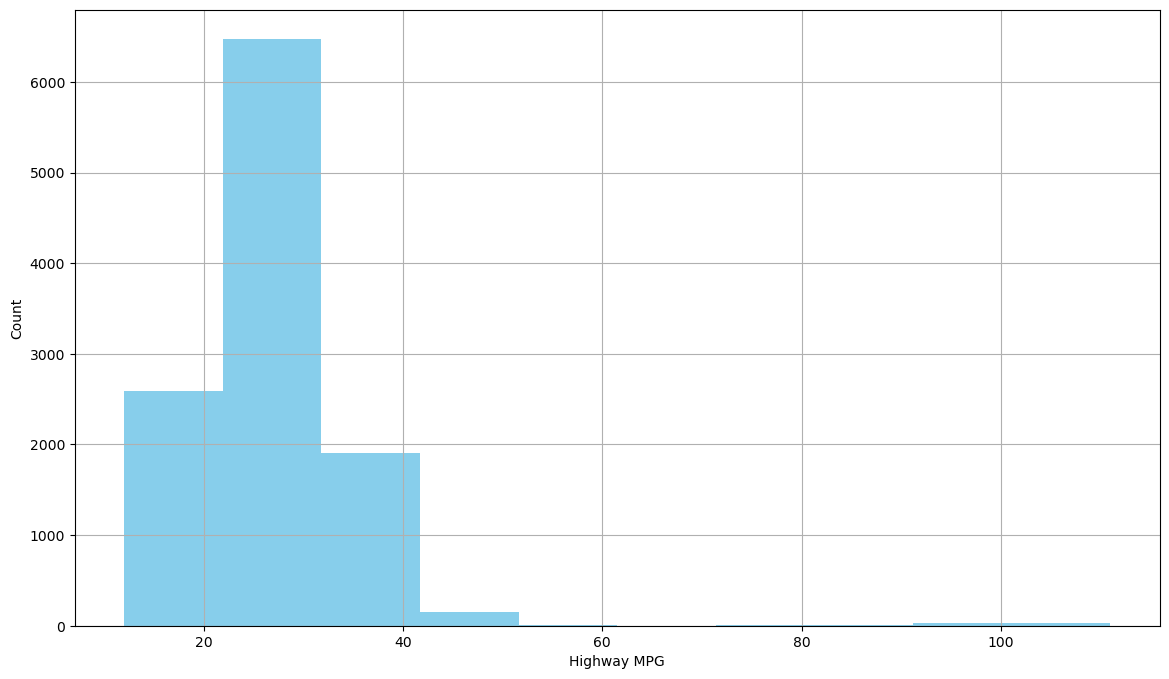

In [246]:
filtered_highway_mpg = cars_df[cars_df['Highway_MPG'] < 125]
filtered_highway_mpg['Highway_MPG'].hist(figsize=(14,8), color='skyblue')
plt.xlabel('Highway MPG')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

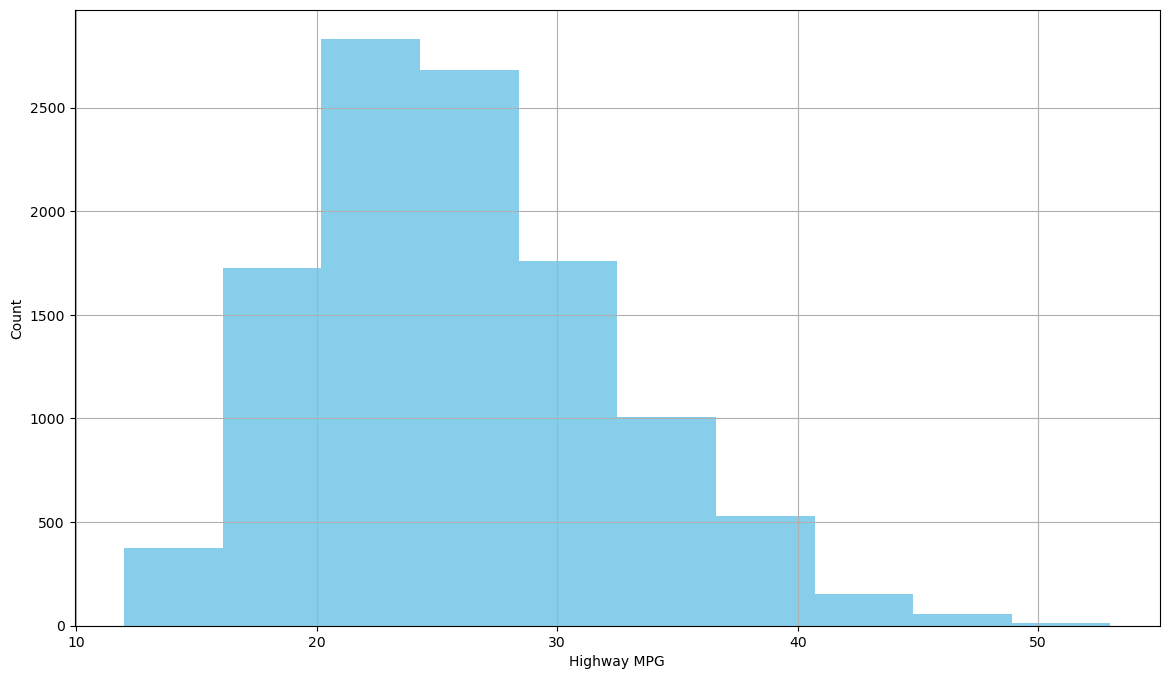

In [247]:
filtered_highway_mpg = cars_df[cars_df['Highway_MPG'] < 60]
filtered_highway_mpg['Highway_MPG'].hist(figsize=(14,8), color='skyblue')
plt.xlabel('Highway MPG')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'Highway MPG':
#### The above histogram shows that:

- There are outliers present around the value of 100 mpg.
- The distribution of the 'Engine_HP' attribute is right-skewed, indicating a higher concentration of cars with lower horsepower.
- The majority of the Highway_MPG values fall within the range of 20 to 30 miles per gallon.

### City MPG

<function matplotlib.pyplot.show(close=None, block=None)>

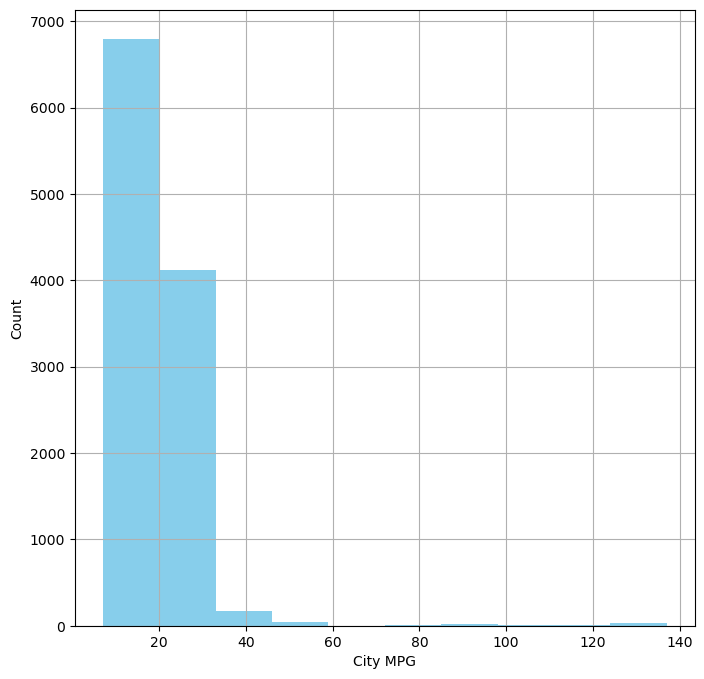

In [248]:
cars_df['City_MPG'].hist(figsize=(8,8), color='skyblue')
plt.xlabel('City MPG')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

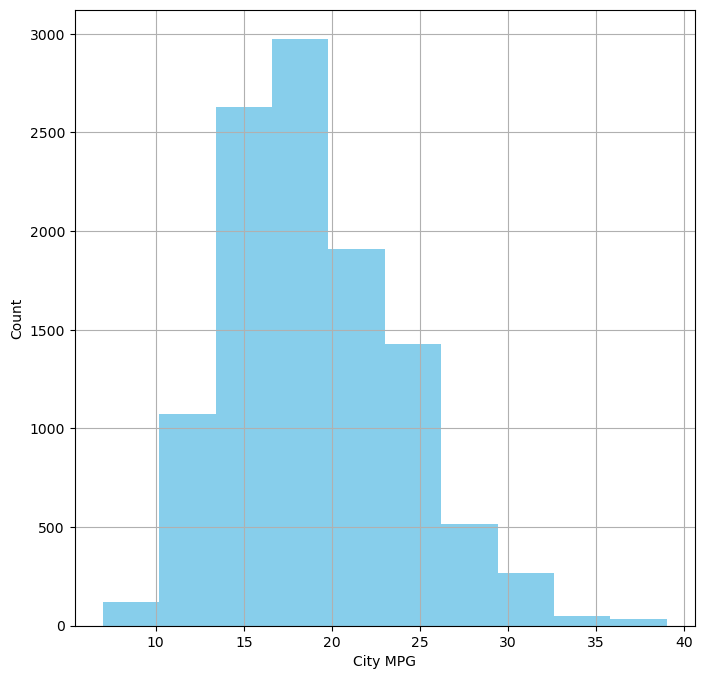

In [249]:
filtered_city_mpg = cars_df[cars_df['City_MPG'] < 40]
filtered_city_mpg['City_MPG'].hist(figsize=(8,8), color='skyblue')
plt.xlabel('City MPG')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'City MPG':
#### The above histogram shows that:
- The distribution of City MPG appears to be right-skewed, indicating that there are relatively fewer cars with high city fuel efficiency.
- There are some outlier values observed around 90 mpg and 130 mpg, suggesting the presence of a few cars with exceptionally high city fuel efficiency.
- The majority of cars in the dataset have City MPG values ranging from 13 to 20 miles per gallon, indicating that most cars exhibit a moderate level of fuel efficiency in urban driving conditions.
- These observations imply that that the cars' fuel efficiency is slightly lower in urban driving conditions compared to highway driving.

### Popularity

<function matplotlib.pyplot.show(close=None, block=None)>

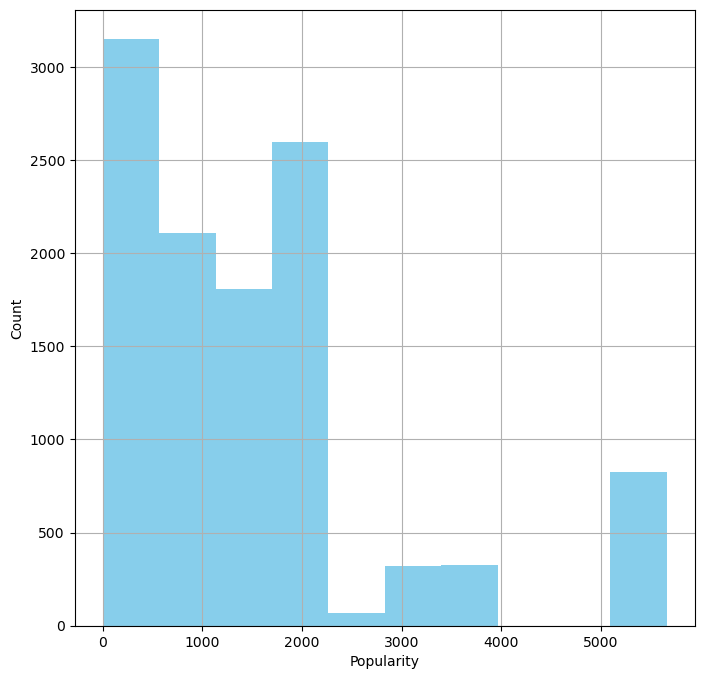

In [250]:
cars_df['Popularity'].hist(figsize=(8,8), color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'Popularity':
#### The above histogram shows that:
- The dataset does not provide specific information about how the popularity score is calculated, leaving us with limited knowledge about its underlying factors and methodology.
- From the available data, it can be observed that there is a relatively low number of cars with high popularity scores.
- The distribution of popularity scores appears to be relatively even between 0 and 2000 points, suggesting a similar level of popularity among cars within this range.
- However, there is a noticeable drop in the number of cars with popularity scores above 2000 points, indicating a potential decrease in popularity beyond this threshold.
- It is worth noting that there is a gap in the dataset, as no cars have popularity scores between 4000 and 5000 points.

### MSRP (Target variable)

<function matplotlib.pyplot.show(close=None, block=None)>

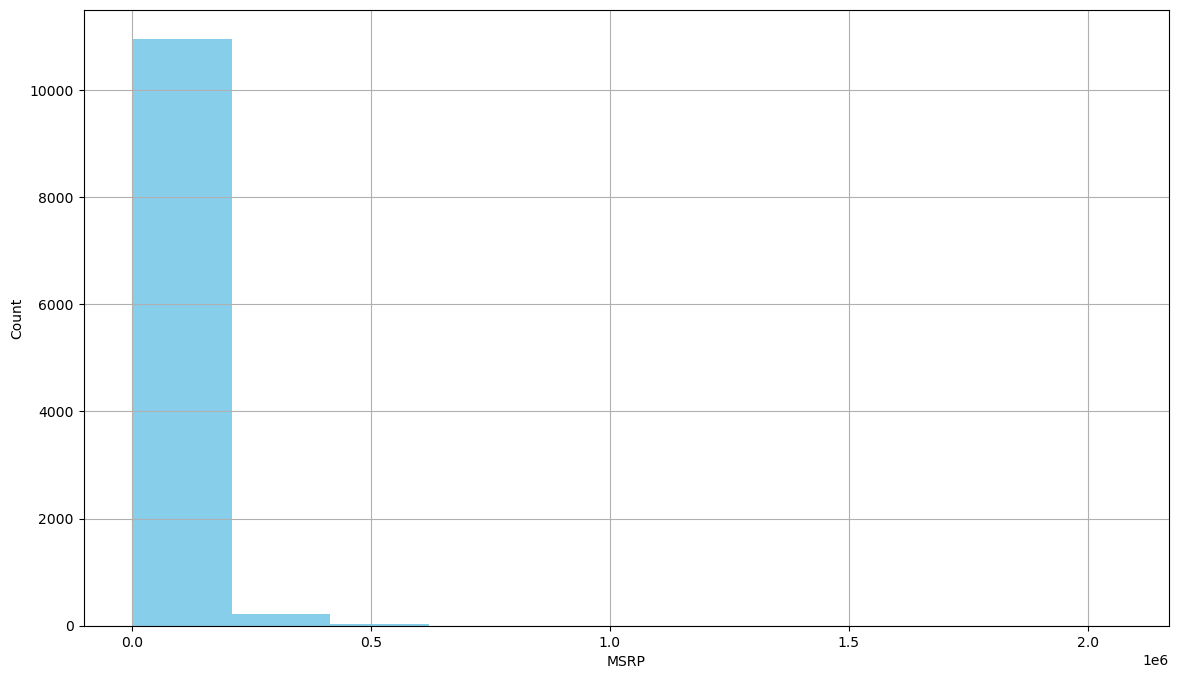

In [251]:
cars_df['MSRP'].hist(figsize=(14,8), color='skyblue')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

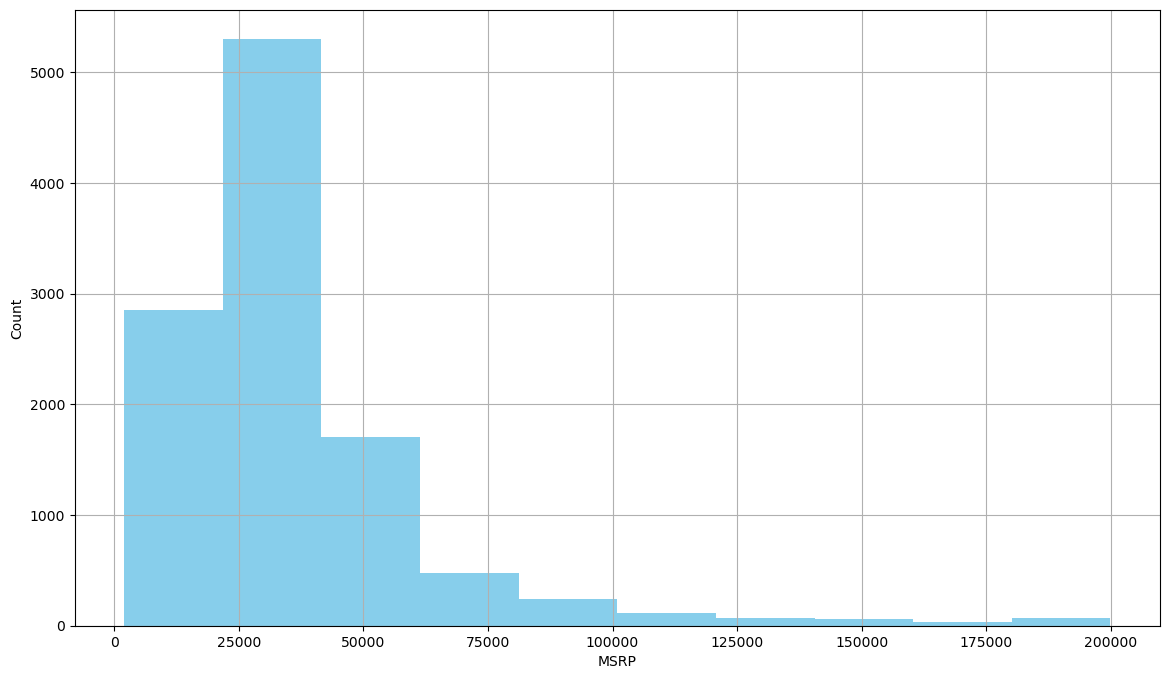

In [294]:
filtered = cars_df[cars_df['MSRP'] < 200000]
filtered['MSRP'].hist(figsize=(14,8), color='skyblue')
plt.xlabel('MSRP')
plt.ylabel('Count')
plt.show

### Description about the distribution of 'MSRP':
#### The above histogram shows that:
- The distribution of car prices in the dataset is right-skewed, indicating that there are relatively fewer cars with high prices compared to lower-priced cars.
- The majority of cars in the dataset have prices that are relatively low.
- Specifically, a significant number of cars have prices below 40,000 dollars, suggesting that more affordable vehicles dominate the dataset.
- There are a few high-end models that significantly raise the average price, which were considered as outliers and left unfiltered in the second histogram.

### Make

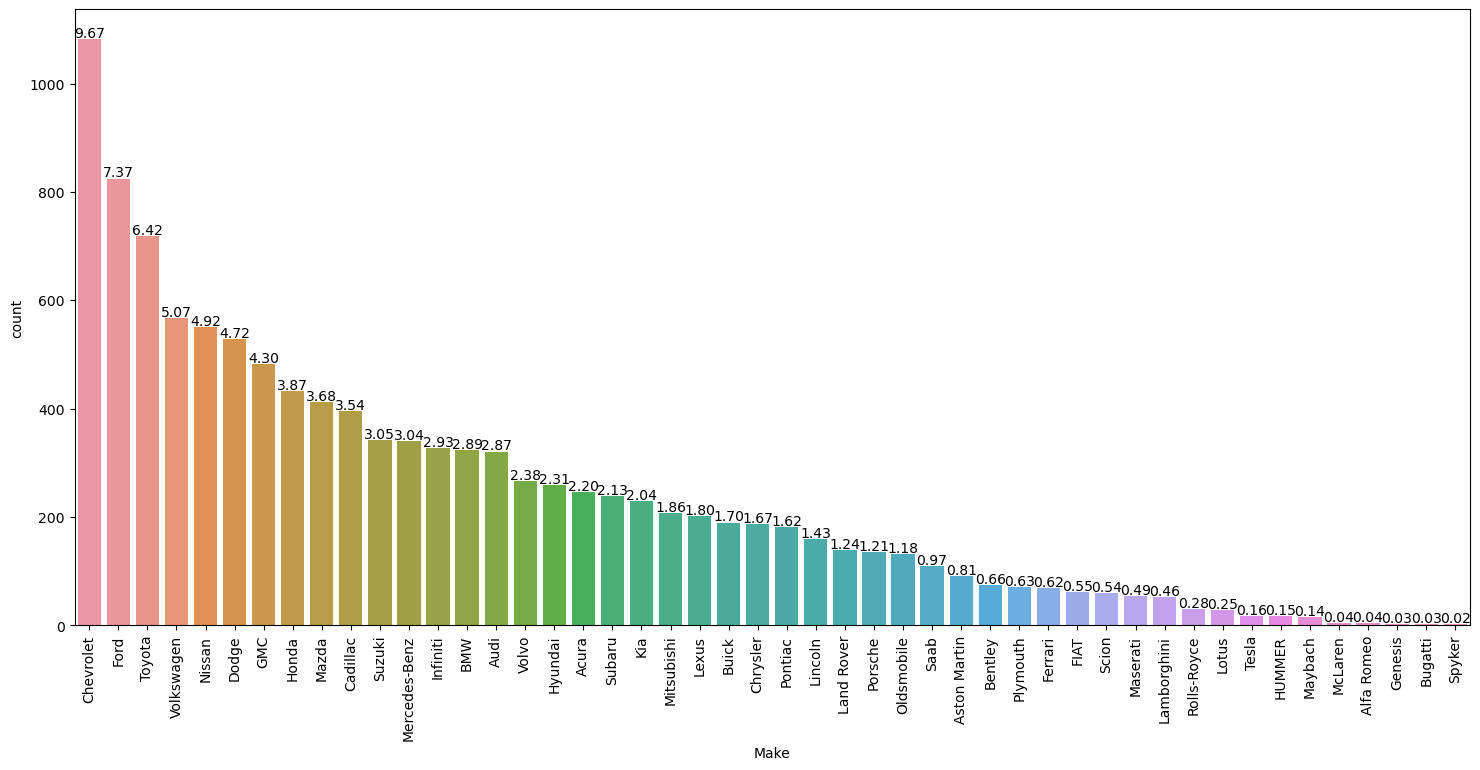

In [253]:
plt.figure(figsize=(18,8))

total = float(len(cars_df))

ax = sns.countplot(x='Make', data=cars_df, order=cars_df['Make'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')
    
plt.xticks(rotation=90)
plt.show()

### Description about the distribution of 'Make':
#### Summary distribution shows that:
- There are 48 unique categories present in the make attribute.
- Most of them are Chevrolet (9,67%).
- Spyker has minimum number of cars (0,02%).

### Engine Fuel Type

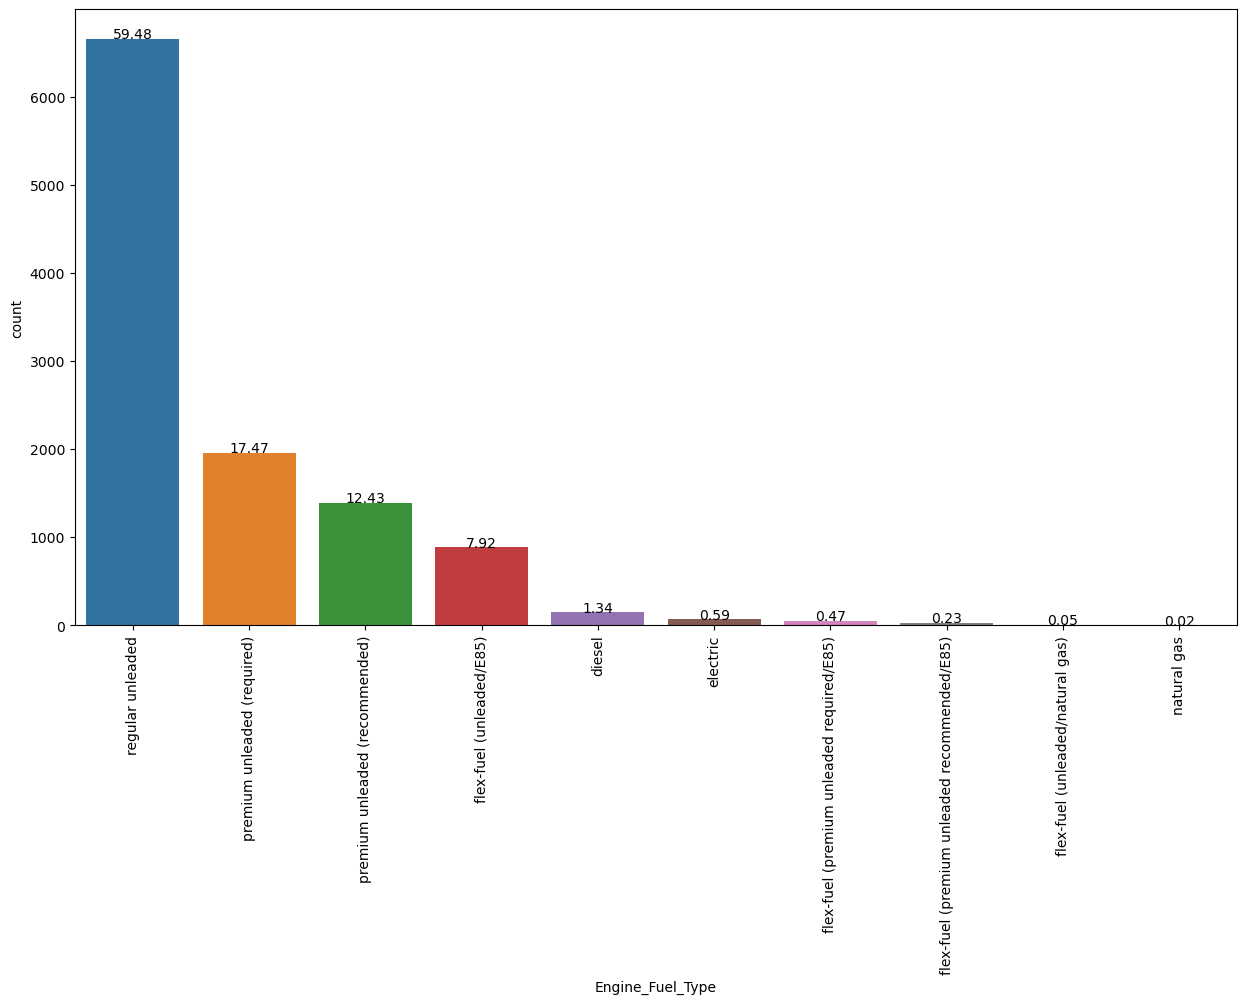

In [254]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Engine_Fuel_Type', data=cars_df, order=cars_df['Engine_Fuel_Type'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha = 'center')
    
plt.xticks(rotation=90)
plt.show()

### Description about the distribution of 'Engine Fuel Type':
#### Summary distribution shows that:
- There are 10 unique categories present in the Engine Fuel Type attribute.
- Most of them are regular unleaded (59,48%).
- Natural gas has minimum samples (0,02%).
- There is huge imbalance in the categories of Engine Fuel Type attribute.

### Engine Cylinders

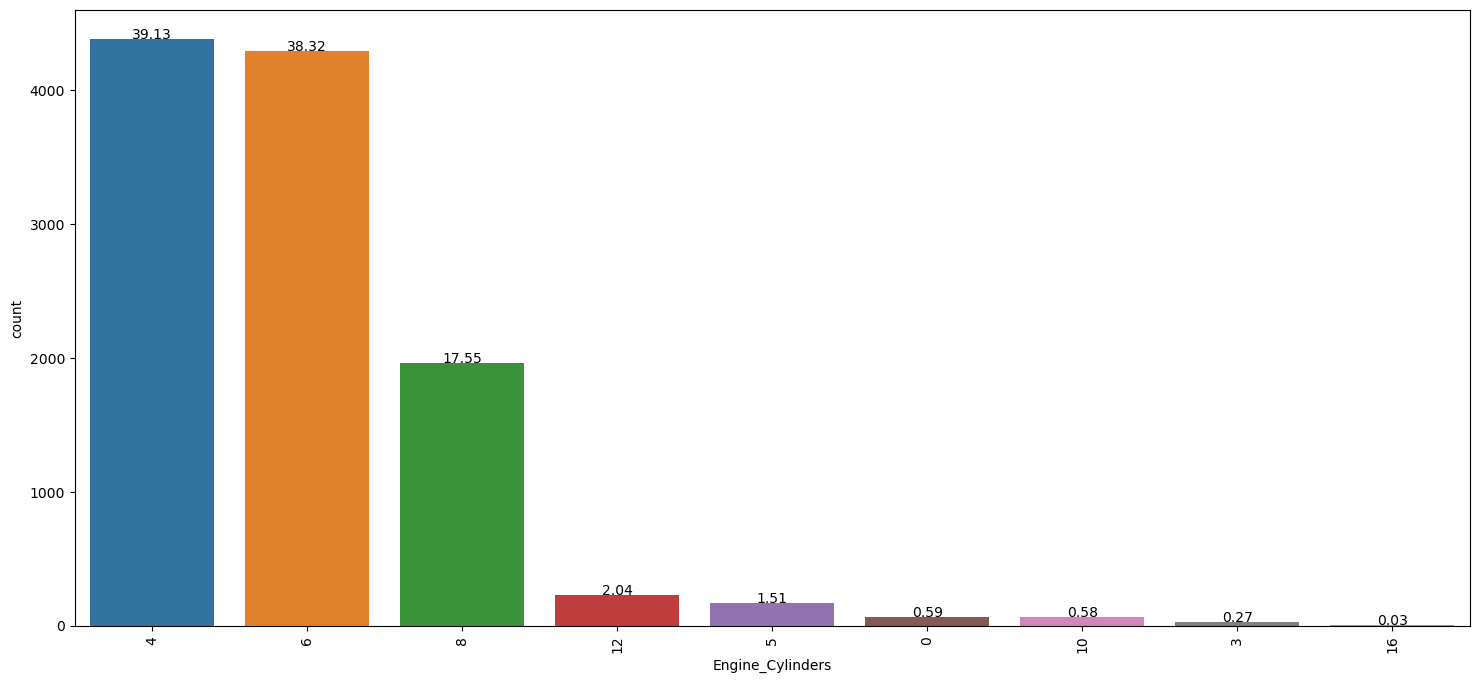

In [255]:
plt.figure(figsize=(18,8))

total = float(len(cars_df))

ax = sns.countplot(x='Engine_Cylinders', data=cars_df, order=cars_df['Engine_Cylinders'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')
    
plt.xticks(rotation=90)
plt.show()

### Description about the distribution of 'Engine Cylinders':
#### The above histogram shows that:
- There are 9 unique categories present in the Engine Cylinders attribute.
- Most of the engines are 4, 6, or 8 cylinders - this aligns with typical engine configurations in many standard passenger vehicles. 
- The least common are the 16-cylinder engines, of which there are only 3. 
- 3-cylinder and 0-cylinder engines (electric cars) are also less common but have more representation than 16-cylinder ones.

### Transmission Type

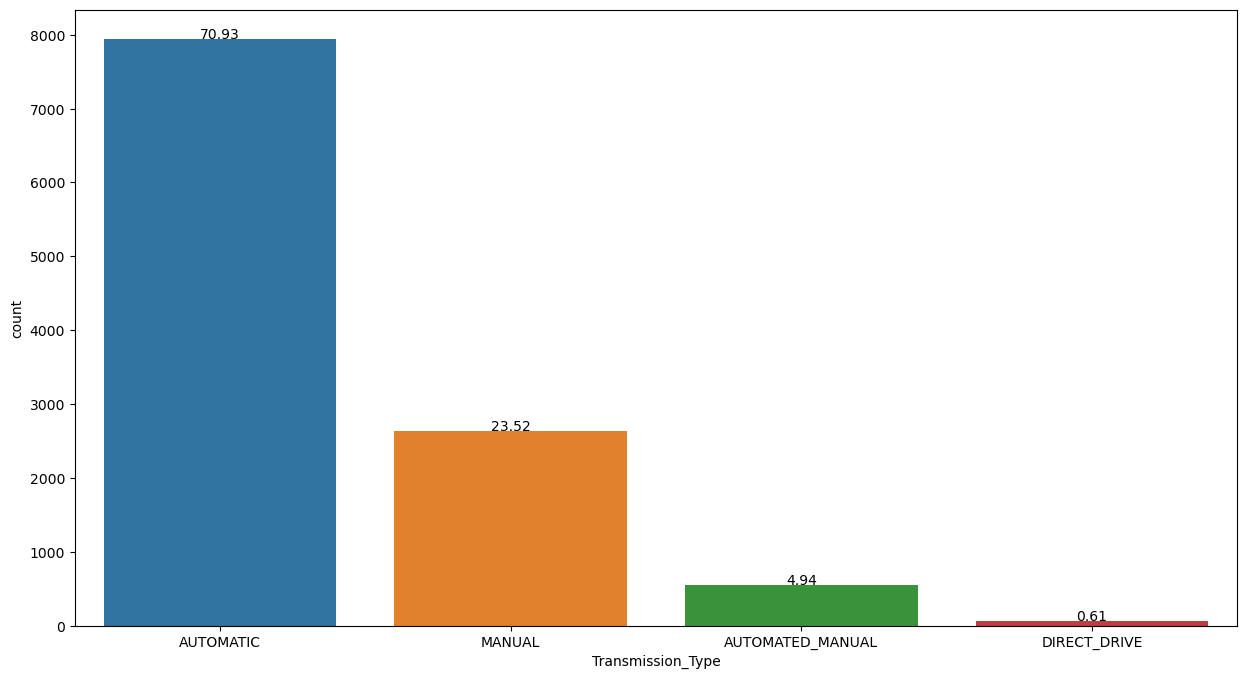

In [256]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Transmission_Type', data=cars_df, order=cars_df['Transmission_Type'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha = 'center')
    
plt.show()

### Description about the distribution of 'Transmission Type':
#### Summary distribution shows that:
- There are 4 unique categories present in the Transmission Type attribute.
- Most of them are automatic (70,93%).
- Direct drive has minimum samples (0.61%).
- There is huge imbalance in the categories of Transmission Type attribute.

### Driven Wheels

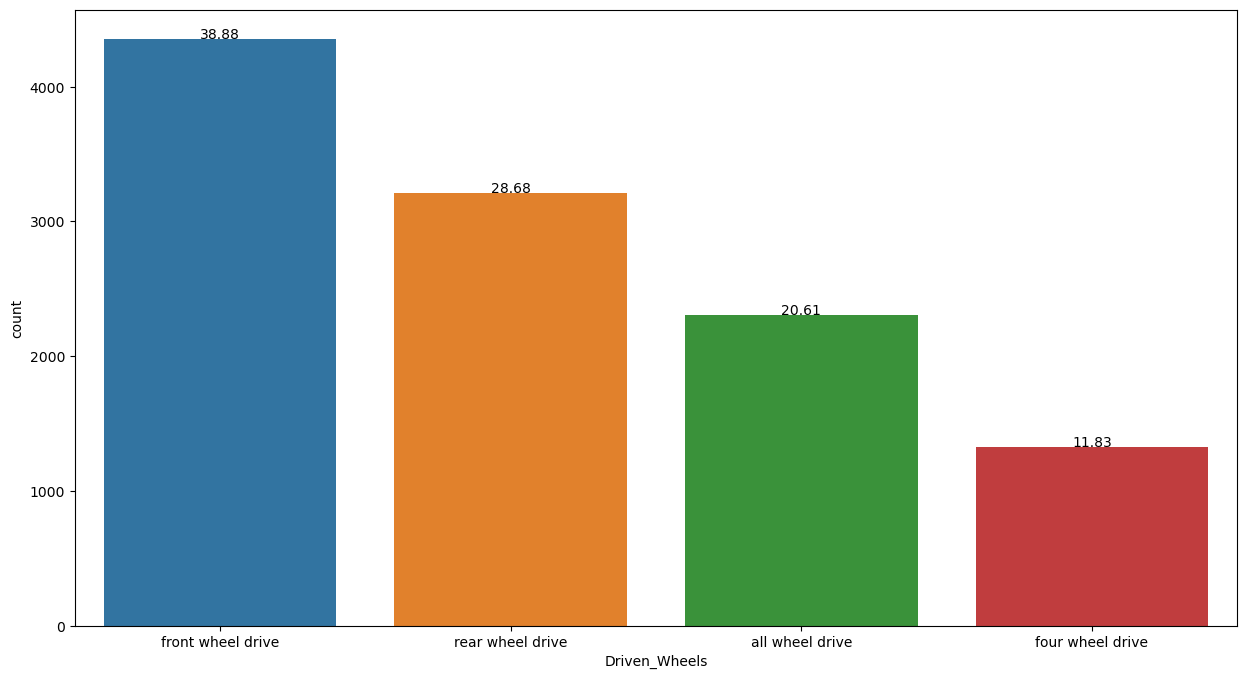

In [257]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Driven_Wheels', data=cars_df, order=cars_df['Driven_Wheels'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')
    
plt.show()

### Description about the distribution of 'Driven Wheels':
#### Summary distribution shows that:
- There are 4 unique categories present in the Driven Wheels attribute.
- Front wheel drive has maximum number of observations (38.88%).
- Four wheel drive has minimum samples (11.83%).

### Number of Doors

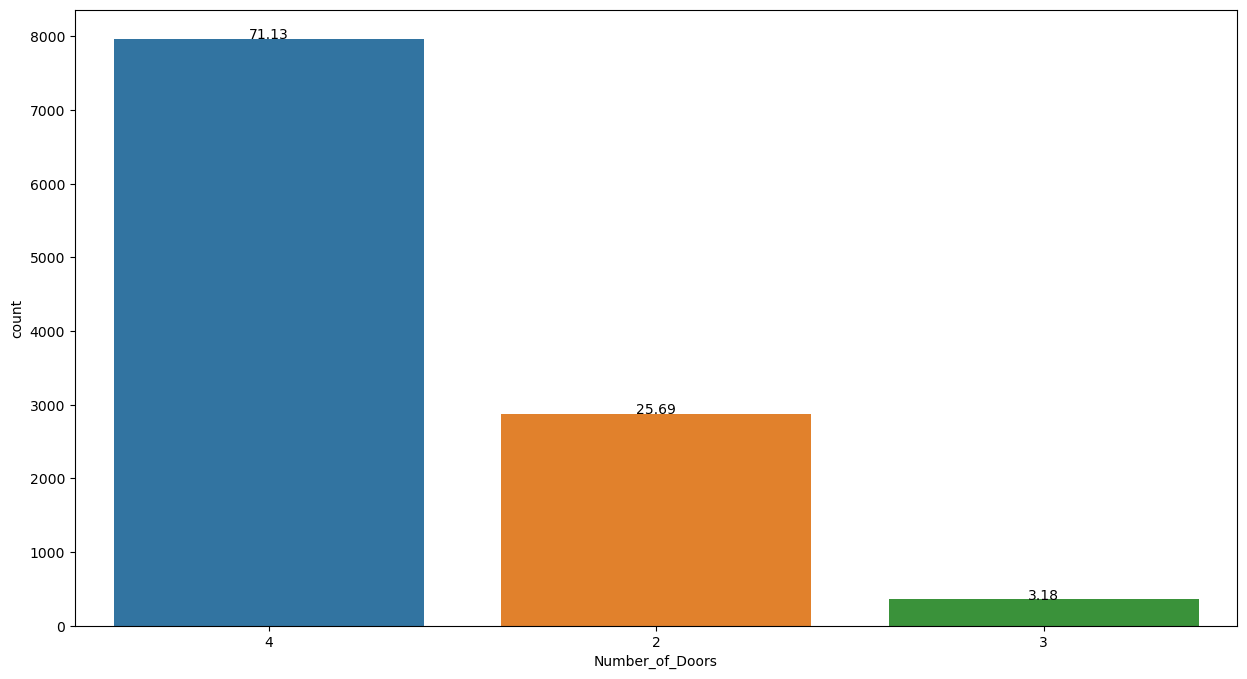

In [258]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Number_of_Doors', data=cars_df, order=cars_df['Number_of_Doors'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha = 'center')

plt.show()

### Description about the distribution of 'Number of Doors':
#### Summary distribution shows that:
- There are 3 unique categories present in the Number of Doors attribute.
- 4 number of doors has maximum number of observations (71.13%).
- 3 number of doors has minimum samples (3.18%).

### Market Category

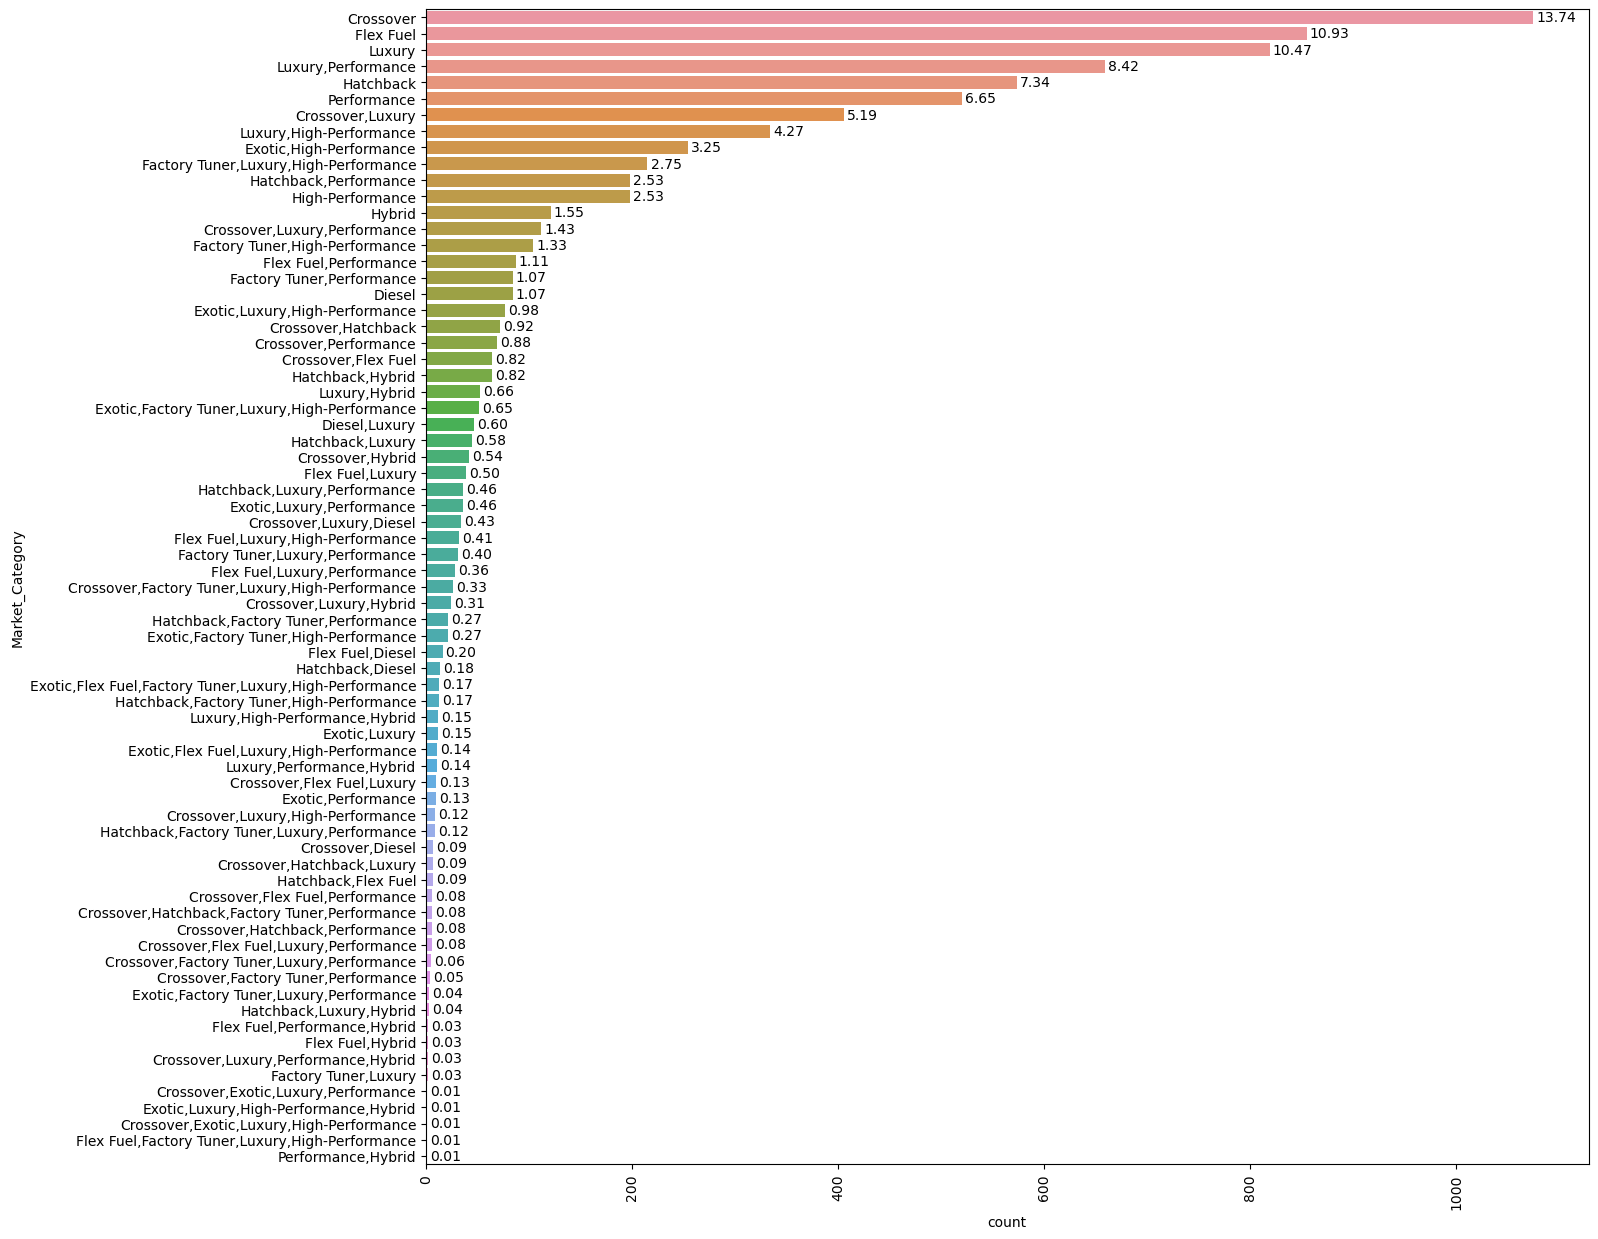

In [259]:
plt.figure(figsize=(15,15))

filtered_nan = cars_df[cars_df['Market_Category'] != 'nan']

total = float(len(filtered_nan['Market_Category']))

ax = sns.countplot(y='Market_Category', data=filtered_nan, order=filtered_nan['Market_Category'].value_counts().index)
for p in ax.patches:
    width = p.get_width()
    percentage = (width/total) * 100
    ax.text(width + 3, p.get_y() + p.get_height()/2.,
            f'{percentage:.2f}',
            va = 'center')

plt.xticks(rotation=90)
plt.show()

### Description about the distribution of 'Market Category':
#### Summary distribution shows that:
- There are 71 unique categories present in the Market Category attribute.
- Most of them are Crossover (13.74%).
- NaN values were filtered out.

### Vehicle Size

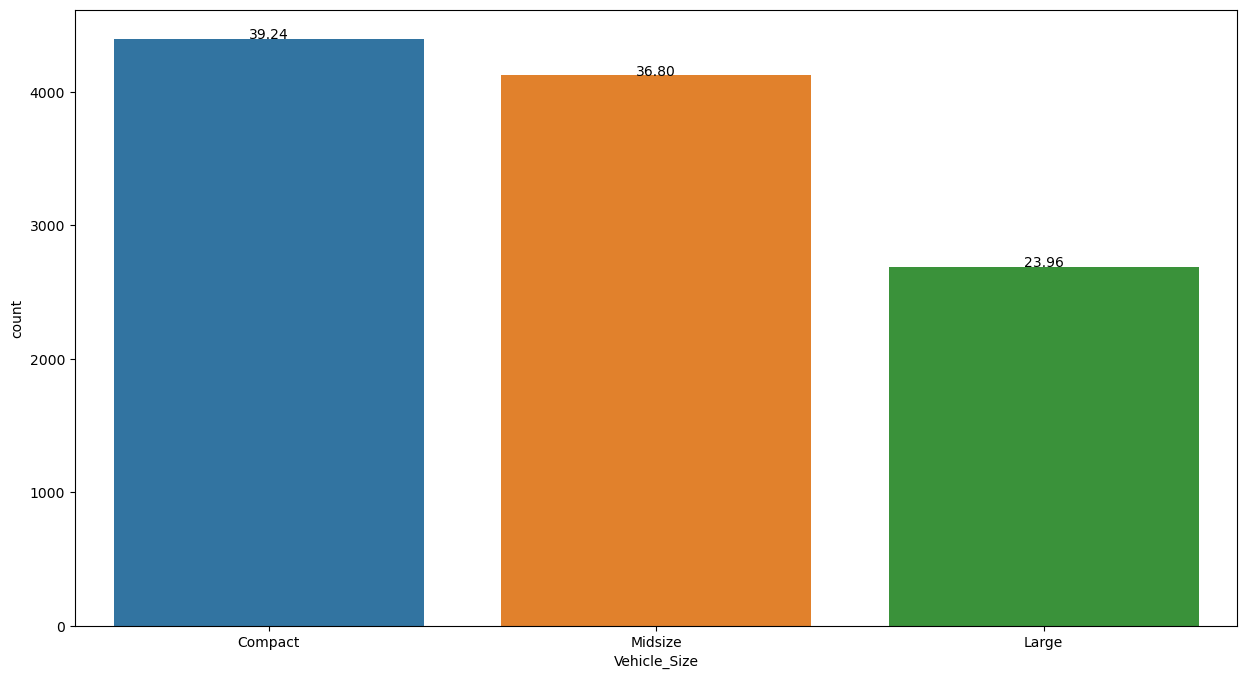

In [260]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Vehicle_Size', data=cars_df, order=cars_df['Vehicle_Size'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height +3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')
    
plt.show()

### Description about the distribution of 'Vehicle Size':
#### Summary distribution shows that:
- There are 3 unique categories present in the Vehicle Size attribute.
- Most of them are compact.
- Compact has maximum number of observations (39.24%).
- Large has minimum samples (23.96%).

### Vehicle Style

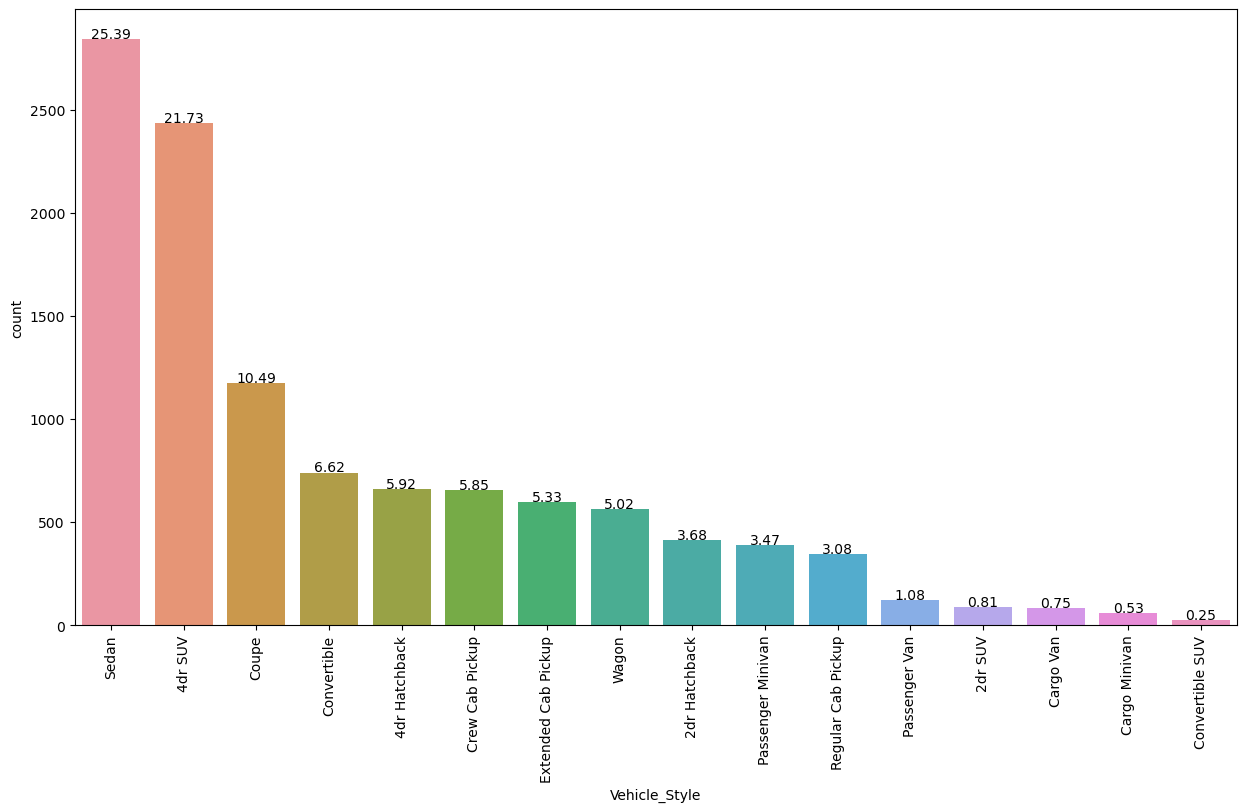

In [261]:
plt.figure(figsize=(15,8))

total = float(len(cars_df))

ax = sns.countplot(x='Vehicle_Style', data=cars_df, order=cars_df['Vehicle_Style'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
           height + 3,
           '{:1.2f}'.format((height/total)*100),
           ha='center')
    
plt.xticks(rotation=90)
plt.show()

### Description about the distribution of 'Vehicle Style':
#### Summary distribution shows that:
- There are 16 unique categories present in the Vehicle Style attribute.
- Most of them are Sedan.
- Sedan (25.39%) has maximum number of observations followed by 4dr SUV (21.73%).
- Convertible SUV has minimum samples (0.25%).

### Bivariate analysis

A comprehensive analysis was conducted on all numeric variables, excluding 'Year'. Certain variables were specifically chosen for further investigation to compare them with the MSRP.

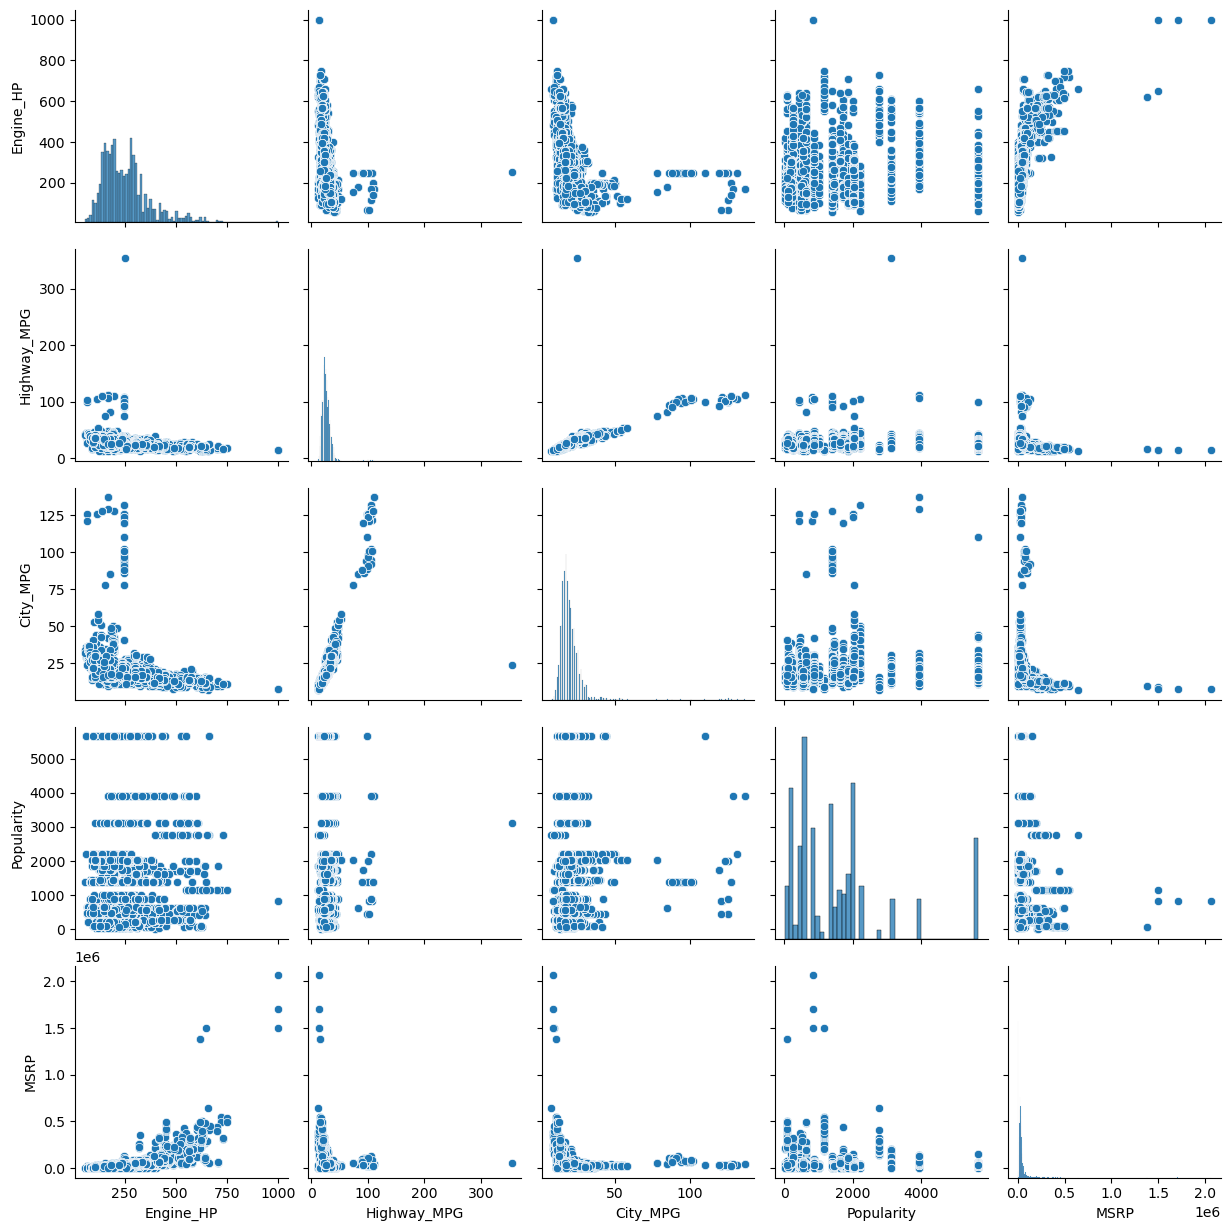

In [262]:
sns.pairplot(cars_df,
            vars=['Engine_HP', 'Highway_MPG', 'City_MPG', 'Popularity', 'MSRP'])
plt.show()

### Engine HP

#### Scatter plot (Relationship with MSRP)

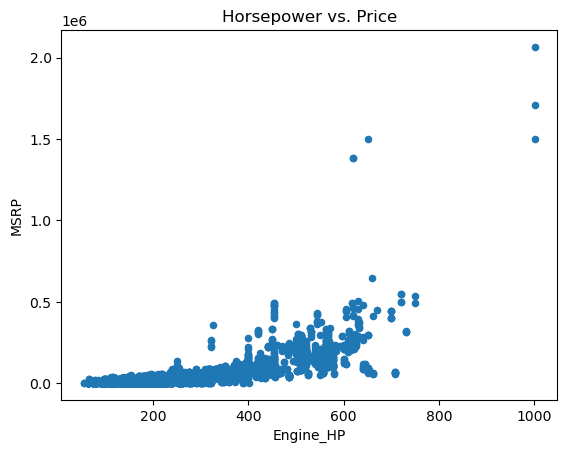

In [263]:
cars_df.plot(kind='scatter',
       x='Engine_HP',
       y='MSRP',
       title='Horsepower vs. Price')
plt.show()

The scatter plot displays data points along with outliers. Outliers are data points that deviate significantly from the overall pattern observed in the plot. These data points are located far away from the majority of the other points, suggesting unusual or extreme values in the dataset.

In [264]:
len(cars_df[cars_df['MSRP'] > 1000000])

6

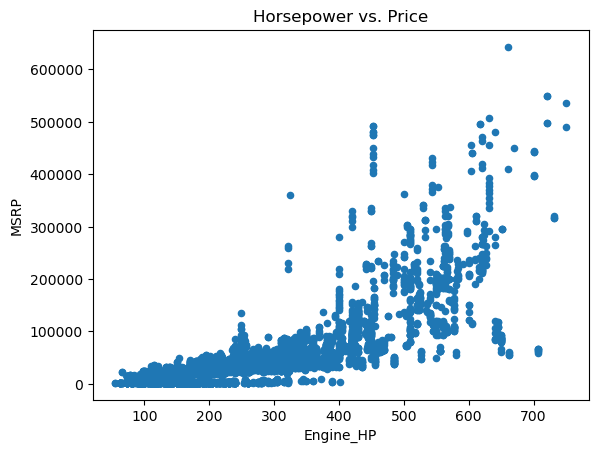

In [265]:
#Plot without outliers
filtered_cars = cars_df[cars_df['MSRP'] < 1000000]

filtered_cars.plot(kind='scatter',
       x='Engine_HP',
       y='MSRP',
       title='Horsepower vs. Price')
plt.show()

Based on scatter plot 'Horsepower vs. Price', it is evident that cars with lower horsepower tend to be cheaper. The majority of cars with horsepower less than 300 have prices below 100,000 dollars. As the horsepower increases, the price of the car also tends to increase. This indicates a clear influence of horsepower on the price of the car.

### Highway MPG

#### Scatter plot (Relationship with MSRP)

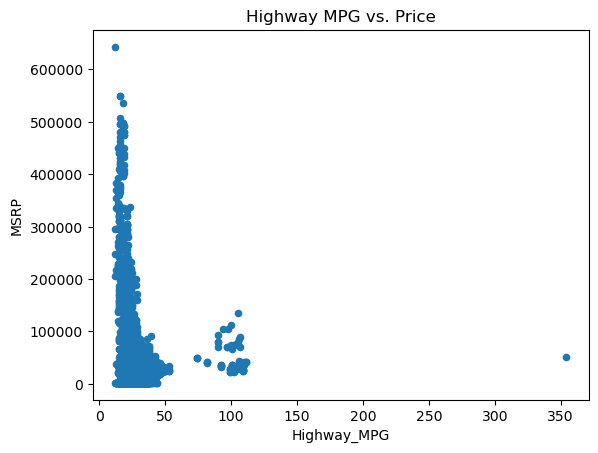

In [266]:
filtered_cars = cars_df[cars_df['MSRP'] < 1000000]

filtered_cars.plot(kind='scatter',
       x='Highway_MPG',
       y='MSRP',
       title='Highway MPG vs. Price')
plt.show()

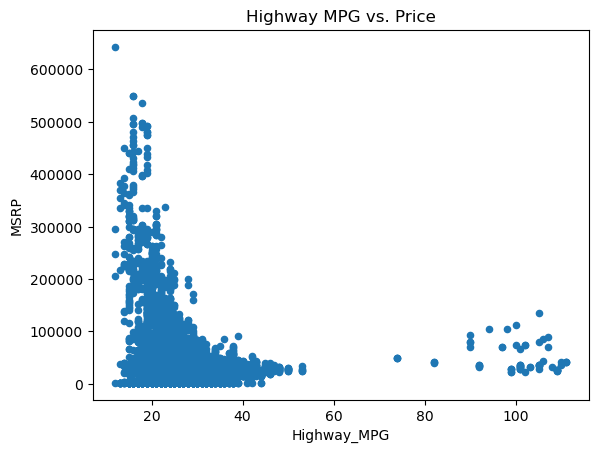

In [267]:
#Plot without outliers
filtered_cars = cars_df[(cars_df['MSRP'] < 1000000) & (cars_df['Highway_MPG'] < 300)]

filtered_cars.plot(kind='scatter',
       x='Highway_MPG',
       y='MSRP',
       title='Highway MPG vs. Price')
plt.show()

Based on the scatter plot 'Highway MPG vs. Price', it is apparent that there is a higher likelihood of cheaper cars having higher highway MPG compared to more expensive cars. However, it is important to note that there are also many affordable cars with relatively lower highway MPG. Additionally, it can be observed that cars priced above 200,000 dollars tend to have highway MPG values lower than 30. This suggests a general trend of lower fuel efficiency for higher-priced cars. 

### City MPG

#### Scatter plot (Relationship with MSRP)

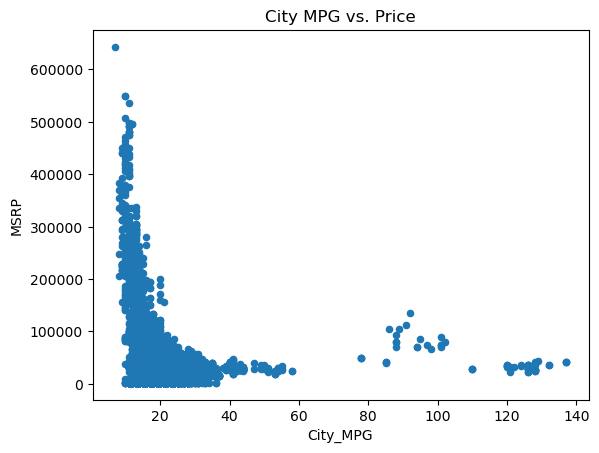

In [268]:
filtered_cars = cars_df[cars_df['MSRP'] < 1000000]

filtered_cars.plot(kind='scatter',
       x='City_MPG',
       y='MSRP',
       title='City MPG vs. Price')
plt.show()

Based on the scatter plot 'City MPG vs. Price', similar conclusions can be drawn as in the case of the 'Highway MPG vs. Price' scatter plot. Cheaper cars are more likely to have higher city MPG, while more expensive cars tend to have lower city MPG. Notably, cars priced above 200,000 dollars exhibit city MPG values lower than 20. This reaffirms the trend of higher-priced cars generally having lower fuel efficiency in urban driving conditions.

### Popularity

#### Scatter plot (Relationship with MSRP)

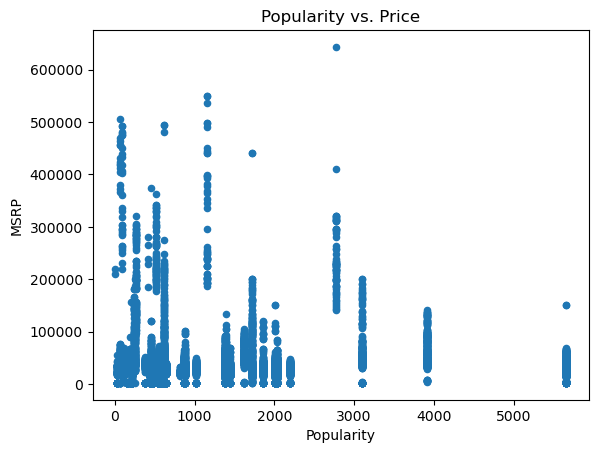

In [269]:
filtered_cars = cars_df[cars_df['MSRP'] < 1000000]

filtered_cars.plot(kind='scatter',
       x='Popularity',
       y='MSRP',
       title='Popularity vs. Price')
plt.show()

This data might suggest that both popular and niche cars are included in the dataset. Popular cars might be expected to be more affordably priced to appeal to a broader market, while niche or luxury models may have higher prices and lower popularity scores.

### Make

#### Boxplot (Relationship with MSRP)

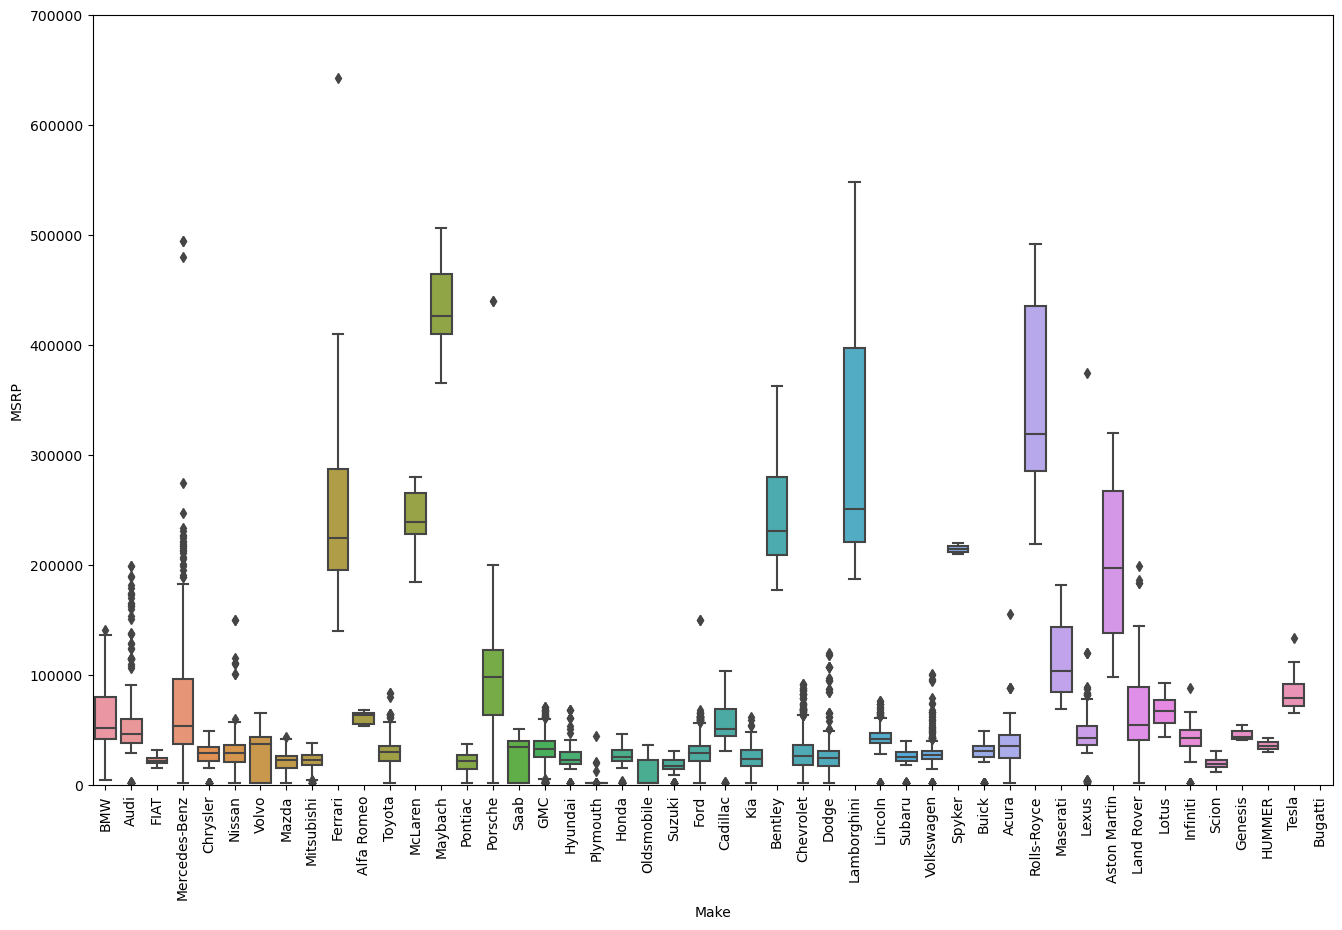

In [270]:
data = pd.concat([cars_df['MSRP'], cars_df['Make']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Make', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=90)

In [271]:
cars_df['Make'].value_counts()

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

#### Conclusions to boxplot:

- Luxury Brands vs. Volume Brands: Luxury brands like Bugatti, Bentley, Aston Martin, and Rolls-Royce have very high mean prices, indicating that they cater to a more affluent market. On the other hand, volume brands like Chevrolet, Ford, and Toyota have many more entries (indicating higher sales volumes) but lower average prices.
- High-End Spectrum: The Bugatti brand, despite having only three entries, has an astonishingly high mean value, suggesting that it operates in a highly exclusive market. Lamborghini, Maybach, and Rolls-Royce also target the upper market spectrum, with their minimum prices being higher than the maximum prices of many volume brands.
- Electric Vehicle (EV) Market: Tesla, a leader in the EV market, has a relatively high mean price, suggesting that electric vehicles are priced at a premium. However, the relatively small count suggests that EVs may still be in the early stages of adoption or penetration in this dataset.

### Engine Fuel Type

#### Boxplot (Relationship with MSRP)

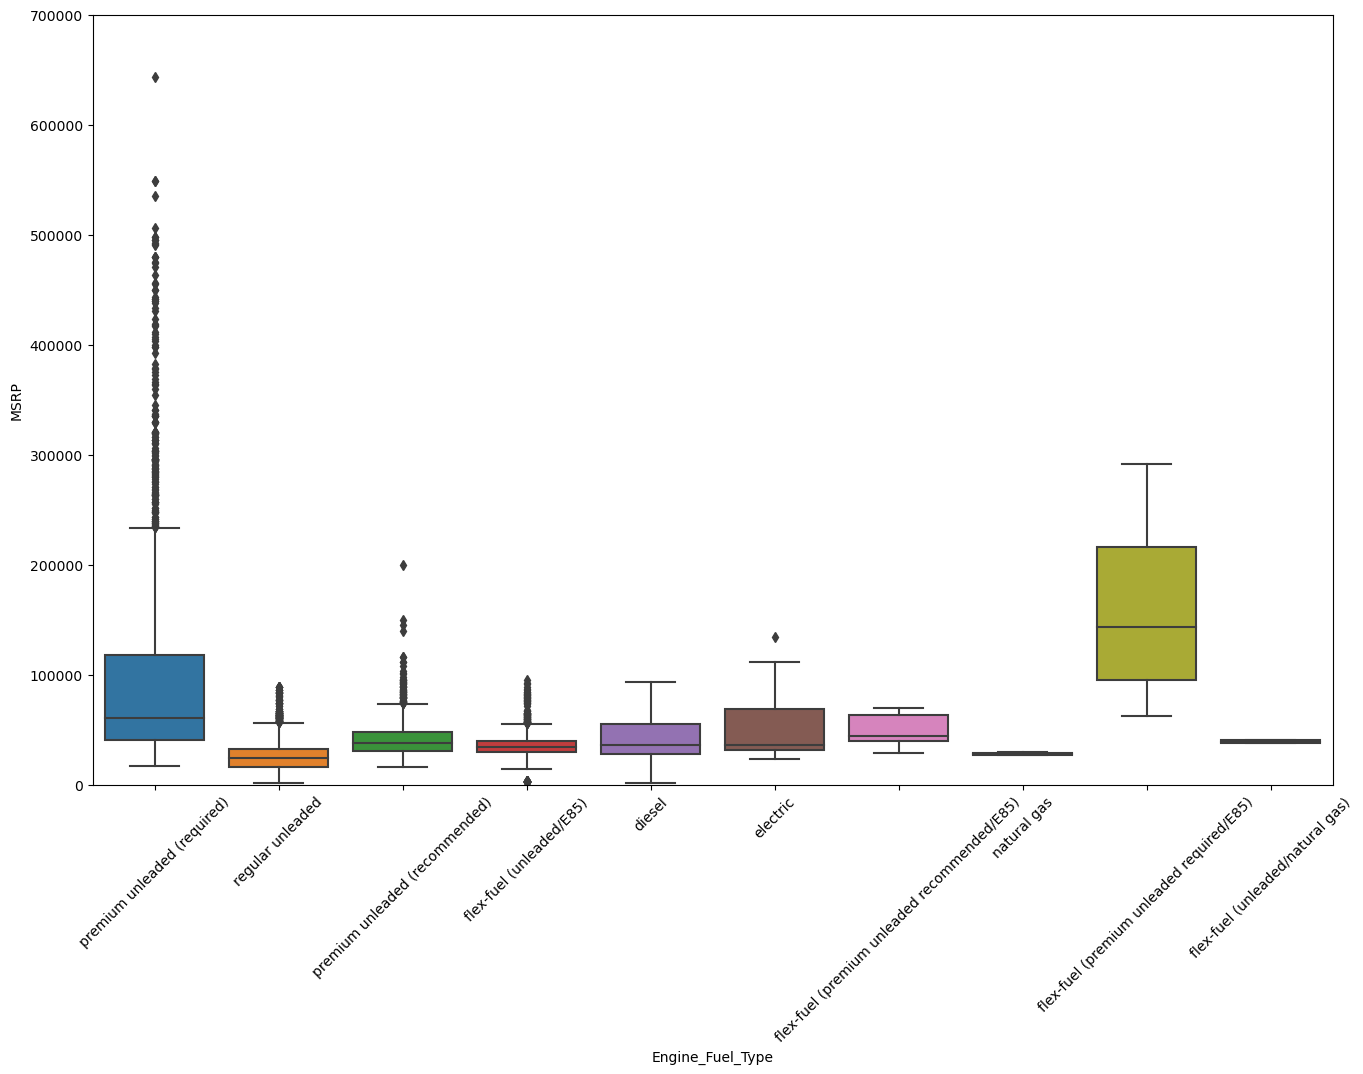

In [272]:
data = pd.concat([cars_df['MSRP'], cars_df['Engine_Fuel_Type']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Engine_Fuel_Type', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)

In [273]:
cars_df['Engine_Fuel_Type'].value_counts()

regular unleaded                                6661
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150
electric                                          66
flex-fuel (premium unleaded required/E85)         53
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine_Fuel_Type, dtype: int64

#### Conclusions to boxplot:

- Fuel Type Impact on Price: Different types of fuel have a significant impact on the average cost of vehicles. For example, flex-fuel vehicles that require premium unleaded/E85 are the most expensive, with an average cost of 160,692 dollars, indicating they are likely luxury or high-performance vehicles. Conversely, vehicles using regular unleaded fuel are on the cheaper end of the spectrum, averaging at 23,830 dollars, which suggests that they are more common, everyday vehicles.
- Variability in Pricing: Variability in vehicle prices, represented by standard deviation (std), is highest for the premium unleaded (required) category. This suggests a wider range of vehicle types in this category, from affordable to luxury or high-end sports cars.
- Potential Anomaly: The maximum price in the "premium unleaded (required)" category is significantly higher than the rest. At 2,065,902 dollars, this could be an outlier or an anomaly that needs to be investigated further.

### Engine Cylinders

#### Boxplot (Relationship with MSRP)

Text(0.5, 1.0, 'Engine Cylinders vs. Price')

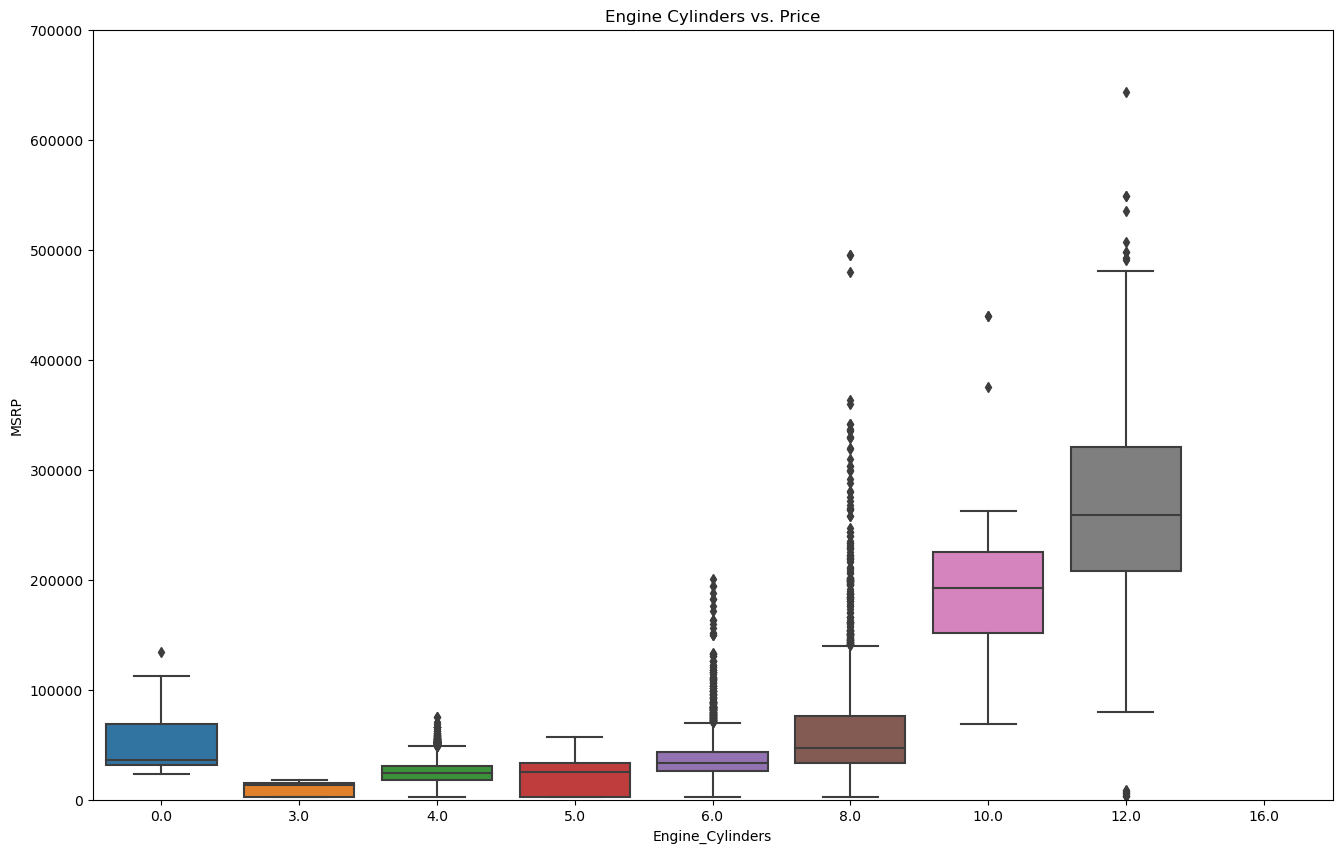

In [274]:
data = pd.concat([cars_df['MSRP'], cars_df['Engine_Cylinders']], axis=1)
data['Engine_Cylinders'] = data['Engine_Cylinders'].astype(float)
f, ax = plt.subplots(figsize=(16, 10))
order = np.sort(data['Engine_Cylinders'].unique())
fig = sns.boxplot(x='Engine_Cylinders', y="MSRP", data=data, order=order)
fig.axis(ymin=0, ymax=700000)
ax.set_title('Engine Cylinders vs. Price')

In [275]:
cars_df['Engine_Cylinders'].value_counts()

4     4382
6     4291
8     1965
12     228
5      169
0       66
10      65
3       30
16       3
Name: Engine_Cylinders, dtype: int64

#### Conclusions to boxplot:

- Price Distribution: We can infer the value or price of cars from this data (assuming the monetary figures represent cost). 4-cylinder cars, being the most common, have a mean value of approximately 24,016.67 dollars. As the number of cylinders increase (from 4 to 10, and then to 12), the mean value also generally increases, indicating that cars with more cylinders tend to be more expensive. However, 5 and 6-cylinder cars break this trend, being cheaper on average than 4-cylinder ones.
- Price Range: The price range (difference between minimum and maximum) also increases as we move from smaller to larger engine sizes, which could suggest more variety in the models available with larger engines. However, 5 and 6-cylinder cars deviate from this trend, having lower price ranges.
- Electric Cars: The 0-cylinder category represents electric cars. With an average value of around 47,943 dollars, they fall within a mid-price range. The max price for an electric vehicle, however, is rather high (134,500 dollars), indicating the presence of high-end electric models.

### Transmission Type

#### Boxplot (Relationship with MSRP)

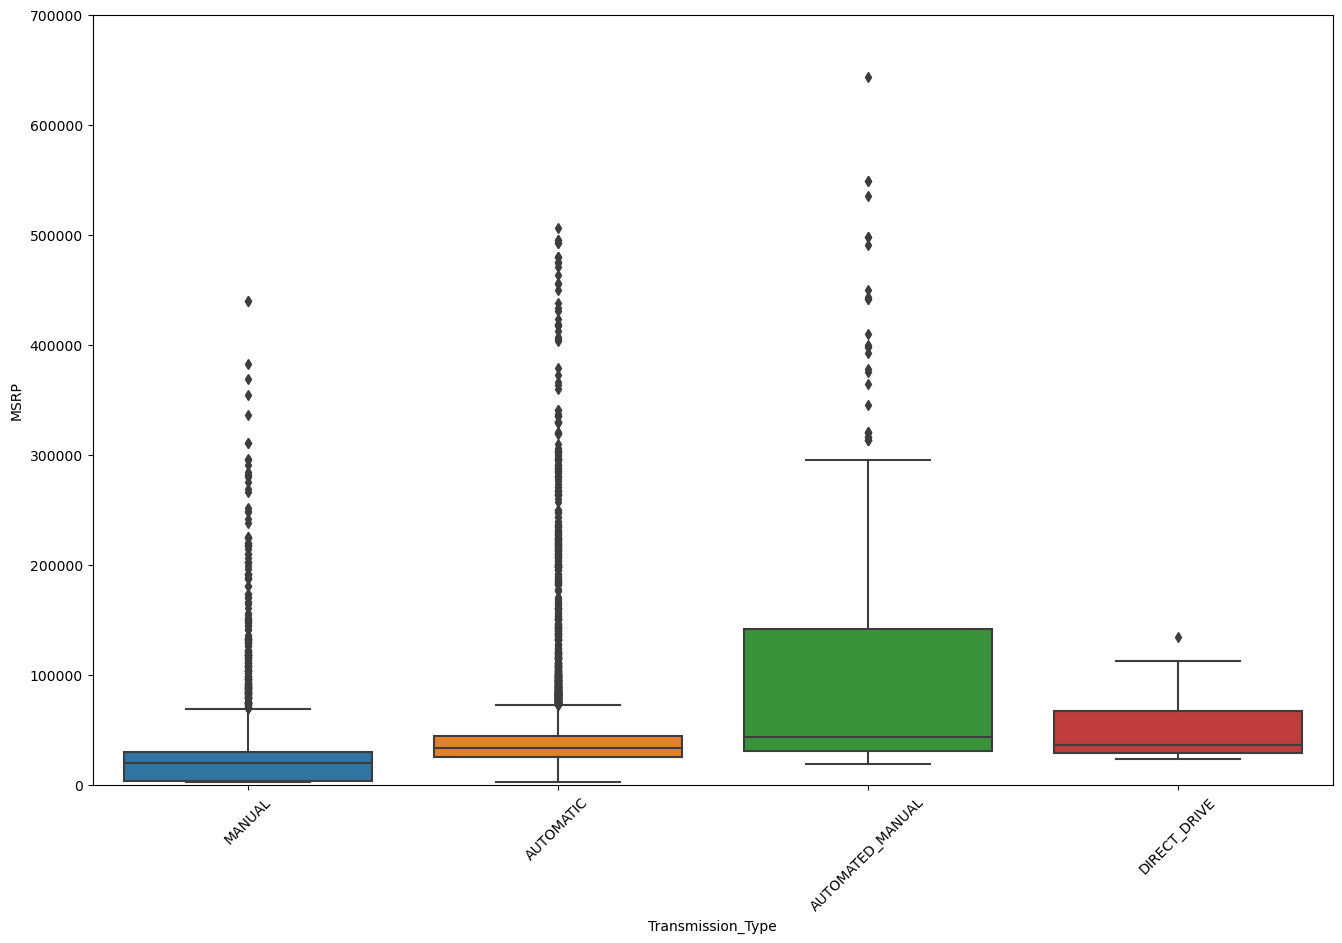

In [276]:
data = pd.concat([cars_df['MSRP'], cars_df['Transmission_Type']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Transmission_Type', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)

In [277]:
cars_df['Transmission_Type'].value_counts()

AUTOMATIC           7944
MANUAL              2634
AUTOMATED_MANUAL     553
DIRECT_DRIVE          68
Name: Transmission_Type, dtype: int64

#### Conclusions to boxplot:

- Expensive Automated Manual Vehicles: The mean price of automated manual transmission vehicles is significantly higher than other types. However, there's a high standard deviation, indicating a wide spread in these prices. This spread is also evident in the large gap between the 75% quartile and the maximum price, suggesting a few very high-priced outliers are likely pushing the mean up. These could potentially be high-performance or luxury vehicles.
- Manual Vehicles are Most Affordable: Manual vehicles, on average, are cheaper than other types. But again, they have a high standard deviation indicating a wide range of prices. The median (50% quartile) is notably less than the mean, showing the distribution of prices is skewed, likely due to a few expensive outliers.

### Driven Wheels

#### Boxplot (Relationship with MSRP)

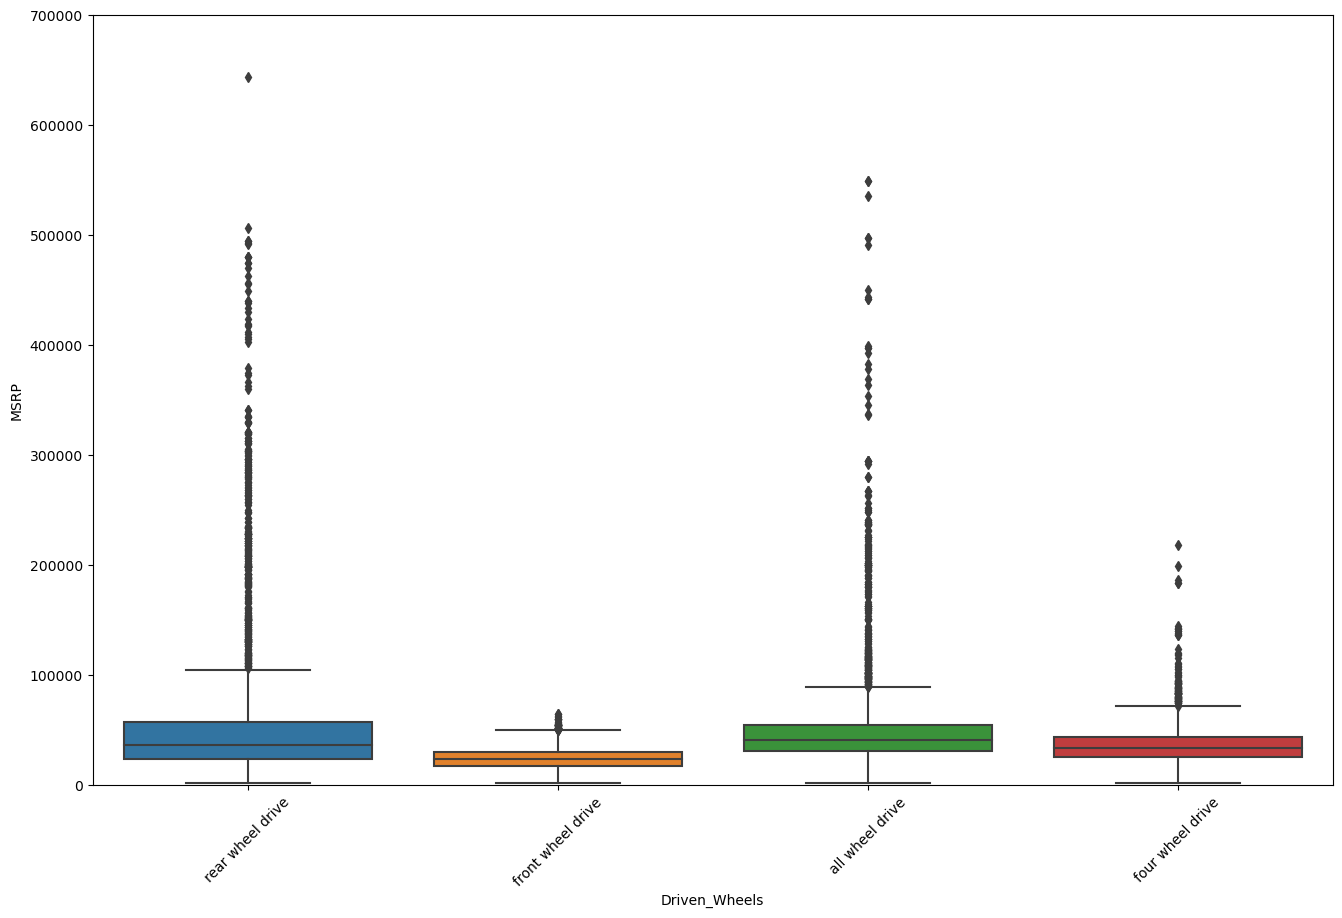

In [278]:
data = pd.concat([cars_df['MSRP'], cars_df['Driven_Wheels']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Driven_Wheels', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)

In [279]:
cars_df['Driven_Wheels'].value_counts()

front wheel drive    4354
rear wheel drive     3212
all wheel drive      2308
four wheel drive     1325
Name: Driven_Wheels, dtype: int64

#### Conclusions to boxplot:

- Mean Price: On average, vehicles with "all wheel drive" and "rear wheel drive" are more expensive than those with "four wheel drive" or "front wheel drive". This may suggest these vehicles are more luxurious, equipped with more advanced features, or perhaps are more expensive to manufacture.
- Price Variability: "All wheel drive" and "rear wheel drive" vehicles also show a higher standard deviation in their prices. This indicates a larger spread of prices, suggesting a wider variety of vehicle models within these categories, from more affordable options to luxury vehicles.
- Price Range: There are some significant outliers in the "all wheel drive" and "rear wheel drive" categories, with maximum prices reaching into the millions. This could be a sign of super luxury or high-performance vehicles in these categories. The "front wheel drive" and "four wheel drive" categories have their max prices much lower, indicating a more homogeneous or less luxury-focused offering.

### Number of Doors

#### Boxplot (Relationship with MSRP)

Text(0.5, 1.0, 'Number of doors vs. Price')

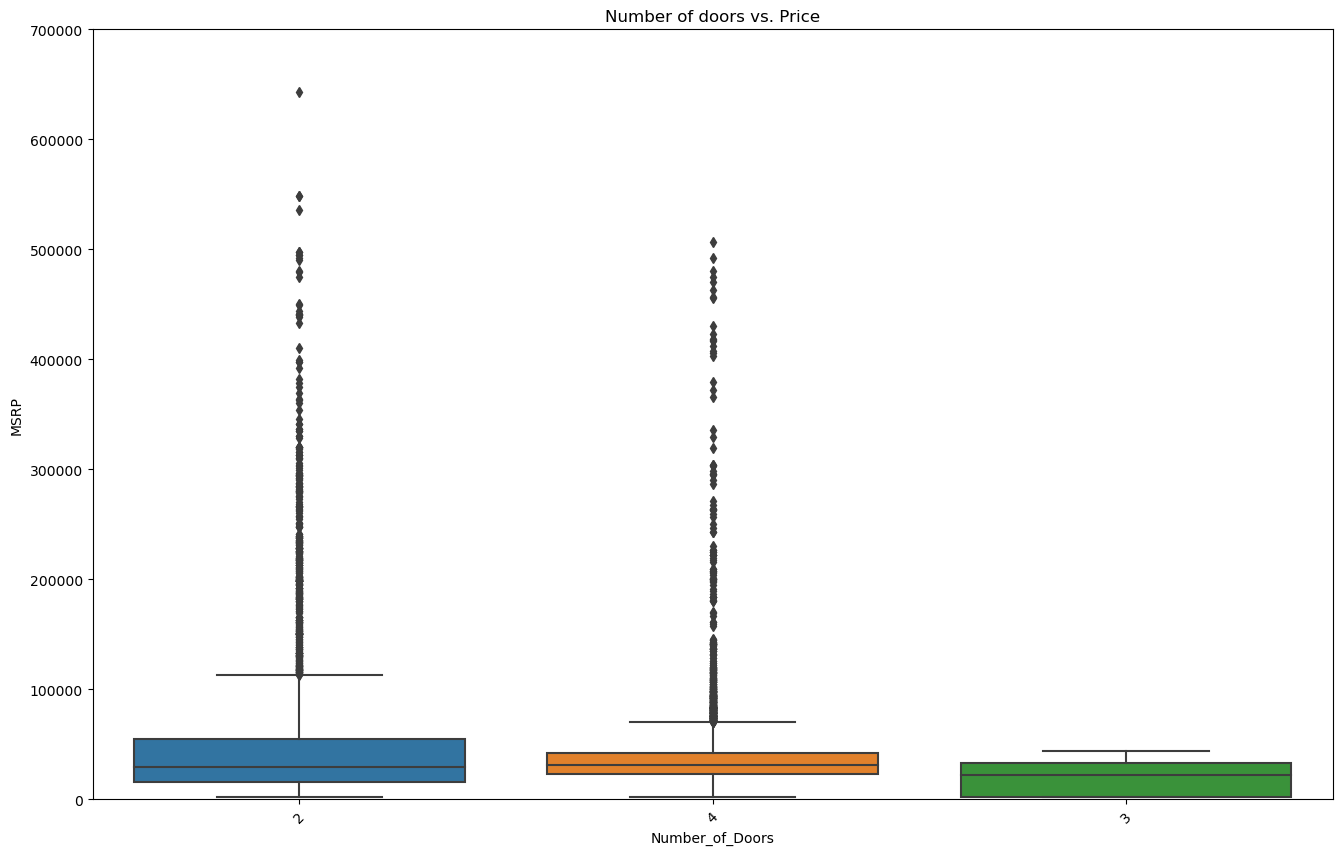

In [280]:
data = pd.concat([cars_df['MSRP'], cars_df['Number_of_Doors']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Number_of_Doors', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)
ax.set_title("Number of doors vs. Price")

In [281]:
cars_df['Number_of_Doors'].value_counts()

4    7966
2    2877
3     356
Name: Number_of_Doors, dtype: int64

#### Conclusions to boxplot:

- Price Ranges and Variability: 2-door cars show the widest range of prices, and also display the highest standard deviation, suggesting a more varied market where cars might range from budget-friendly options to very high-end luxury or sports cars. In contrast, the 3-door cars are in the lower range, topping out at just 43,995 dollars. This suggests that 3-door cars might be typically targeted towards the budget or mid-range market segments.
- Median Prices: When looking at the median (50% percentile), 4-door cars are the most expensive (31,290 dollars), followed by 2-door cars (29,395 dollars), and finally 3-door cars (22,245 dollars). The median is less sensitive to extreme scores than the mean, providing a better measure of central tendency for highly skewed distributions, suggesting that for the majority of customers, a 4-door car would be the most expensive option.

### Vehicle Size

#### Boxplot (Relationship with MSRP)

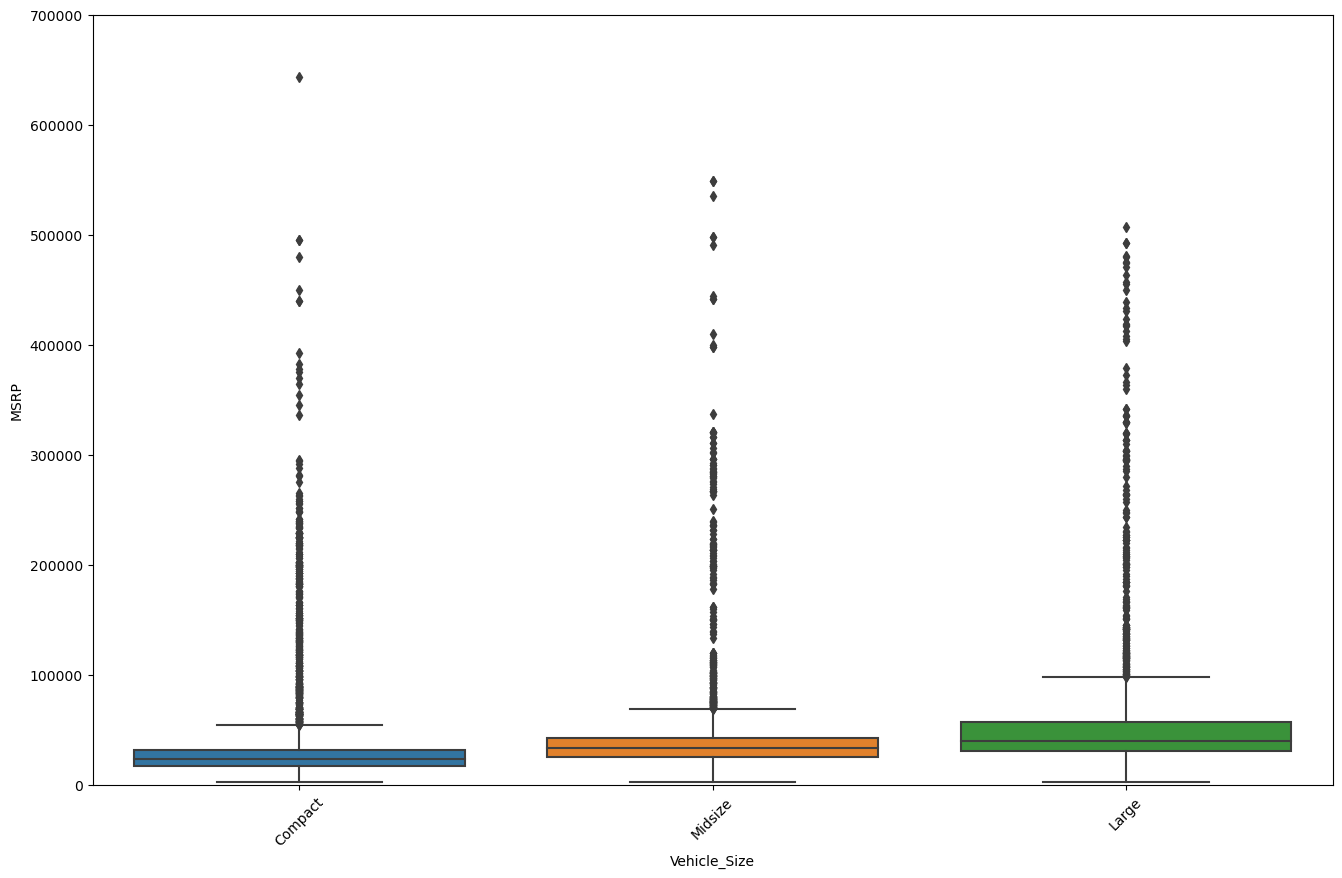

In [282]:
data = pd.concat([cars_df['MSRP'], cars_df['Vehicle_Size']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Vehicle_Size', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)

In [283]:
cars_df['Vehicle_Size'].value_counts()

Compact    4395
Midsize    4121
Large      2683
Name: Vehicle_Size, dtype: int64

#### Conclusions to boxplot:

- Average Price: On average, large vehicles are the most expensive, followed by midsize and compact vehicles respectively. This likely indicates that larger vehicles come with more features or capabilities that drive up their price.
- Price Variability: The standard deviation (std) which measures price variability, is the highest for compact vehicles despite them having the lowest mean price. This suggests a wide range of prices for compact vehicles - from very cheap to unexpectedly expensive. Large vehicles, while having a higher mean price, show less variability. Midsize vehicles have the lowest variability, which could mean that their prices are more consistent and predictable.
- Extreme Values (Outliers): Compact cars have a maximum price which is significantly higher than both the midsize and large vehicles. This could be due to luxury or collector's models in the compact category or could be due to errors or outliers in the dataset. Similarly, large vehicles also have a max value which is much higher than their 75th percentile, indicating possible outliers.

### Vehicle Style

#### Boxplot (Relationship with MSRP)

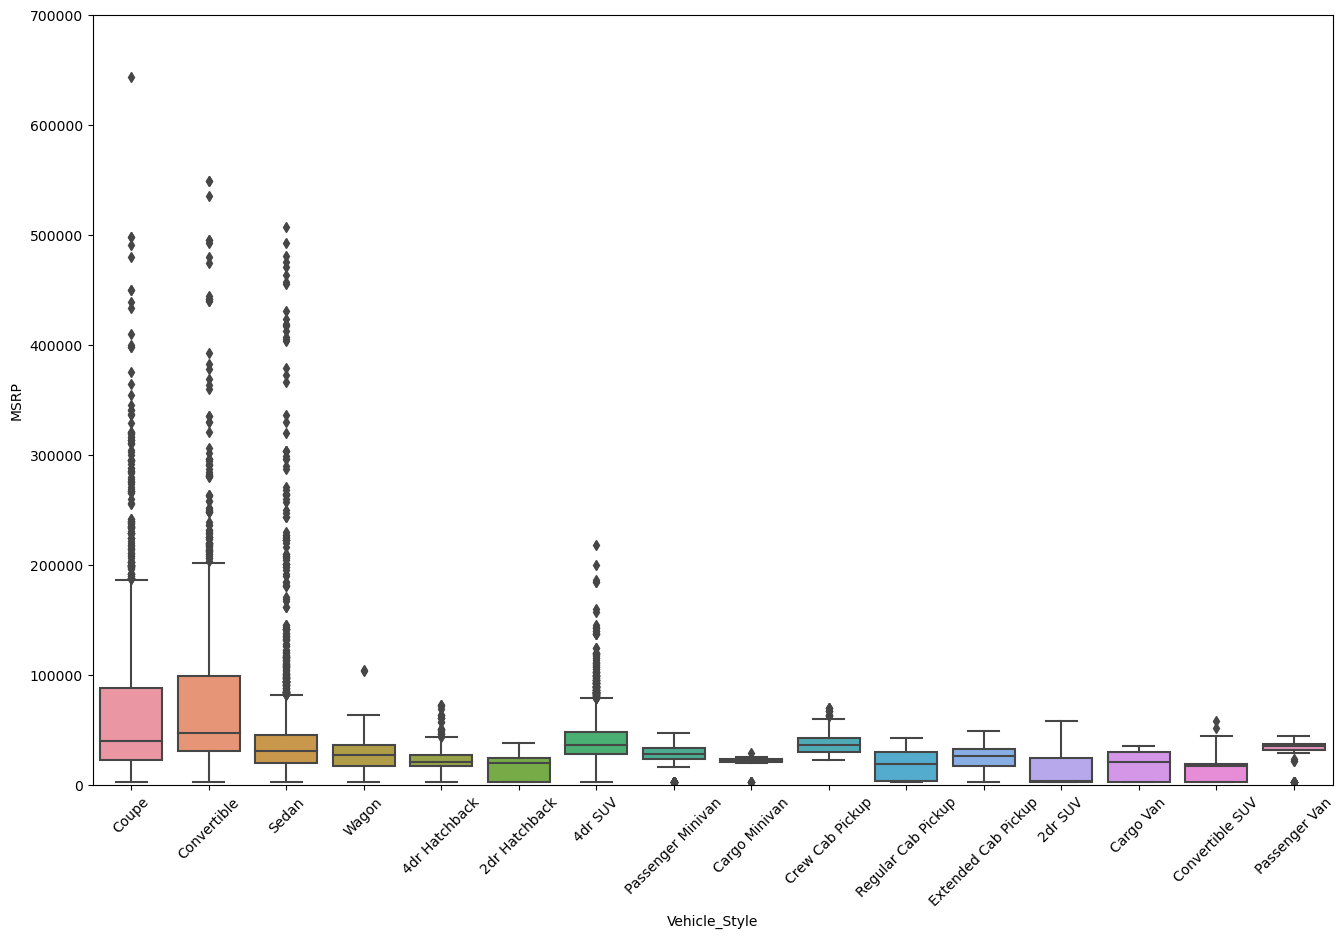

In [284]:
data = pd.concat([cars_df['MSRP'], cars_df['Vehicle_Style']], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Vehicle_Style', y="MSRP", data=data)
fig.axis(ymin=0, ymax=700000);
xt = plt.xticks(rotation=45)

In [285]:
cars_df['Vehicle_Style'].value_counts()

Sedan                  2843
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         655
Extended Cab Pickup     597
Wagon                   562
2dr Hatchback           412
Passenger Minivan       389
Regular Cab Pickup      345
Passenger Van           121
2dr SUV                  91
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: Vehicle_Style, dtype: int64

#### Conclusions to boxplot:

- High-End Market: The "Convertible" and "Coupe" categories represent the highest average prices (mean), with Convertible having a mean price of 88,216.79 dollars and Coupe having a mean of 77,595.28 dollars. This suggests that these types of vehicles are potentially luxury, high-performance, or premium branded vehicles. The maximum price for a "Coupe" is over 2 million dollars, highlighting that some models in these categories are extremely high-end.
- Low-End Market: The "2dr Hatchback", "2dr SUV", and "Regular Cab Pickup" have the lowest average prices, suggesting that these vehicle types fall into a lower price range or budget category. The "2dr SUV" and "Regular Cab Pickup" in particular show a large portion of the vehicles priced at the minimum of 2000 dollars, which might be due to older models or pre-owned vehicles.
- Variability in Prices: The "Convertible" and "Coupe" categories have the highest standard deviation, indicating a high variability in vehicle prices within these categories. This could be due to a wide range of models, from relatively affordable to high-end luxury models.

### Outliers

During the previous analysis, it was evident that the dataset contains a significant number of outliers. To identify and filter out these outliers, the z-score can be utilized. The z-score provides a standardized measure of how far each data point deviates from the mean. By applying appropriate z-score thresholds, all the outliers can be effectively identified.

In [286]:
z_scores = stats.zscore(cars_df['MSRP'])
outliers = cars_df[(z_scores < -3) | (z_scores > 3)]
outliers

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style,Highway_MPG,City_MPG,Popularity,MSRP
462,Ferrari,456M,2002,premium unleaded (required),442.0,12,AUTOMATIC,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
464,Ferrari,456M,2003,premium unleaded (required),442.0,12,AUTOMATIC,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,14,9,2774,228625
466,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
467,Ferrari,458 Italia,2013,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
468,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,17,13,2774,233509
469,Ferrari,458 Italia,2014,premium unleaded (required),597.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,17,13,2774,288000
470,Ferrari,458 Italia,2014,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Convertible,17,13,2774,257412
471,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,17,13,2774,239340
472,Ferrari,458 Italia,2015,premium unleaded (required),562.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Convertible,17,13,2774,263553
473,Ferrari,458 Italia,2015,premium unleaded (required),597.0,8,AUTOMATED_MANUAL,rear wheel drive,2,"Exotic,High-Performance",Compact,Coupe,17,13,2774,291744


In [287]:
print('Number of outliers present in this dataset: ', len(outliers))

Number of outliers present in this dataset:  202


In [288]:
outliers.describe()

,Year,Engine_HP,Highway_MPG,City_MPG,Popularity,MSRP
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,2011.316832,567.920792,17.371287,11.153465,877.896040,3.594842e+05
std,4.118713,98.560503,2.472891,1.657551,920.375974,2.351092e+05
min,2001.000000,322.000000,12.000000,7.000000,67.000000,2.268500e+05
25%,2009.000000,510.000000,16.000000,10.000000,259.000000,2.599250e+05
50%,2012.000000,565.000000,17.000000,11.000000,520.000000,2.959185e+05
75%,2015.000000,621.000000,19.000000,13.000000,1158.000000,3.815625e+05
max,2017.000000,1001.000000,24.000000,16.000000,2774.000000,2.065902e+06


In [289]:
outliers.describe(include=["O"])

,Make,Model,Engine_Fuel_Type,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Market_Category,Vehicle_Size,Vehicle_Style
count,202,202,202,202,202,202,202,202,202,202
unique,11,58,2,4,3,2,2,9,3,3
top,Bentley,DBS,premium unleaded (required),12,AUTOMATIC,rear wheel drive,2,"Exotic,High-Performance",Large,Coupe
freq,39,16,192,138,113,145,153,87,80,93


In [290]:
outliers['Make'].value_counts()

Bentley          39
Lamborghini      35
Ferrari          33
Rolls-Royce      30
Aston Martin     30
Maybach          16
Mercedes-Benz     9
McLaren           4
Bugatti           3
Porsche           2
Lexus             1
Name: Make, dtype: int64

The dataset contains a group of outliers consisting of very expensive cars priced above 226,850 dollars. These outliers primarily belong to luxury car brands, including Bentley (39 cars), Lamborghini (35 cars), Ferrari (33 cars), Rolls-Royce (30 cars), Aston Martin (30 cars), Maybach (16 cars), Mercedes-Benz (9 cars), McLaren (4 cars), Bugatti (3 cars), Porsche (2 cars), and Lexus (1 car). These luxury brands are known for their high-end vehicles. 

### Some multivariate relationships

### Correlation among the numeric variables

In [291]:
df_corr = cars_df[['Year', 'Engine_HP', 'Engine_Cylinders', 'Number_of_Doors', 'Highway_MPG', 'City_MPG', 'Popularity', 'MSRP']].corr()

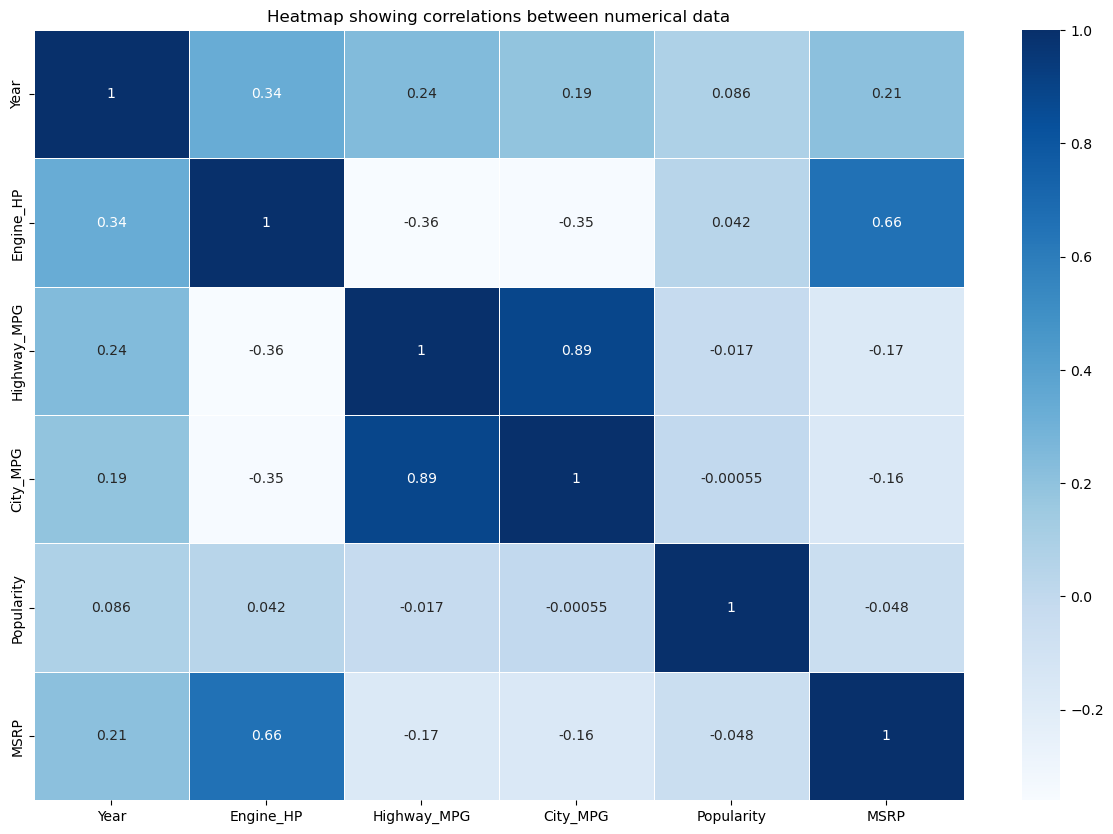

In [292]:
cars_df['Engine_Cylinders'] = cars_df['Engine_Cylinders'].astype(float)
cars_df['Number_of_Doors'] = cars_df['Number_of_Doors'].astype(float)

plt.figure(figsize=(15,10)) 
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

- There isn't very strong correlation among the numeric attributes.
- The strongest correlation is present between city MPG and highway MPG with Coefficient 0.89 and engine HP and engine cylinders with Coefficient 0.78.
- A moderate positive correlation is present between engine HP and MSRP with Coefficient 0.66, as higher performance cars (with more HP) are typically more expensive.

## Summary

The dataset contains information about different car brands and models from 1990 to 2017. It covers a wide price range, including cars at various price points. Upon examining the dataset, it is noticeable that the majority of the cars are newer models, particularly those from the year 2014 onwards. This indicates a focus on more recent cars in the dataset.

## Conclusions

#### Based on the analysis of the dataset, the following conclusions can be drawn:

- Brand significantly influences car prices. Luxury brands like Bugatti, Bentley, Aston Martin, and Rolls-Royce have higher average prices, while volume brands like Chevrolet, Ford, and Toyota have lower average prices.
- Fuel type plays a significant role in determining average prices. Flex-fuel vehicles requiring premium unleaded/E85 are the most expensive, while those using regular unleaded fuel are more affordable.
- The number of cylinders generally impacts car prices, except for 5 and 6-cylinder cars that tend to be cheaper. 16-cylinder cars represent the high-end luxury market.
- Automated manual transmission vehicles have higher average prices, potentially due to high-performance or luxury features. Manual transmission vehicles are generally more affordable.
- "All wheel drive" and "rear wheel drive" vehicles command higher average prices compared to "four wheel drive" and "front wheel drive" counterparts.
- Larger vehicles, such as SUVs and trucks, have higher average prices compared to midsize and compact vehicles.
- The "Convertible" and "Coupe" categories have the highest average prices, suggesting luxury or high-performance characteristics.
- Popular cars tend to have more affordable prices, catering to a wider market, while niche or luxury models often have higher prices and lower popularity scores.